In [1]:
#numerical python for mathematical functions
import numpy as np

#pandas library
import pandas as pd

#matplotlib library
import matplotlib.pyplot as plt

#seaborn library
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

In [2]:
df=pd.read_csv('autos.csv')

In [3]:
df.head()

index          dateCrawled                            name  seller  \
0      0  2016-03-24 11:52:17                      Golf_3_1.6  privat   
1      1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   
2      2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   
3      3  2016-03-17 16:54:04              GOLF_4_1_4__3TÜRER  privat   
4      4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   

  offerType  price abtest vehicleType  yearOfRegistration    gearbox  powerPS  \
0   Angebot    480   test         NaN                1993    manuell        0   
1   Angebot  18300   test       coupe                2011    manuell      190   
2   Angebot   9800   test         suv                2004  automatik      163   
3   Angebot   1500   test  kleinwagen                2001    manuell       75   
4   Angebot   3600   test  kleinwagen                2008    manuell       69   

   model  kilometer  monthOfRegistration fuelType       brand  \
0   golf     150000                    0   benzin  volkswagen   
1    NaN     125000                    5   diesel        audi   
2  grand     125000                    8   diesel        jeep   
3   golf     150000                    6   benzin  volkswagen   
4  fabia      90000                    7   diesel       skoda   

  notRepairedDamage          dateCreated  nrOfPictures  postalCode  \
0               NaN  2016-03-24 00:00:00             0       70435   
1                ja  2016-03-24 00:00:00             0       66954   
2               NaN  2016-03-14 00:00:00             0       90480   
3              nein  2016-03-17 00:00:00             0       91074   
4              nein  2016-03-31 00:00:00             0       60437   

              lastSeen  
0  2016-04-07 03:16:57  
1  2016-04-07 01:46:50  
2  2016-04-05 12:47:46  
3  2016-03-17 17:40:17  
4  2016-04-06 10:17:21

The autos.csv dataset is a comprehensive collection of valuable data about used cars, and provides insight into how the cars are being sold, what price they are being sold for, and all the details about their condition. Each ad contains information such as dateCrawled (the date the ad was first seen), name of the car, seller type (private or dealer), offer type, price, A/B testing information , vehicle type, year of registration (at which year was the car first registered) , gearbox type, power output in PS (horsepower) , model of car , howmany kilometers has it driven so far , monthof registration(when it was first registered)(essentially giving us an idea about its age), fueltype utilized by it( petrol/diesel /electricity/lpg etc.), brand name to which it belongs to notRepairedDamage - if there is any damage on the vehicle that has not been repaired yet. DateCreated gives us information when this particular advertisement was created in ebay or other place where these cars can be posted. The nrofpictures field will give you an estimate regarding how many images have been included with this ad and postalcode contain info regarding area code where car have been posted.. Lastly lastseen give us time estimation when a crawler last scan this particular post online



DATA DESCRIPTION AND DATA TYPES

| Column name        | Description                                                                |
|-------------------|----------------------------------------------------------------------------|
| dateCrawled       | Date the car was crawled. (Date)                                           |
| name              | Name of the car. (String)                                                  |
| seller            | Type of seller (private or dealer). (String)                               |
| offerType         | Type of offer (e.g. sale, repair, etc.). (String)                         |
| price             | Price of the car. (Integer)                                                |
| abtest            | Test type (A or B). (String)                                              |
| vehicleType       | Type of vehicle (e.g. SUV, sedan, etc.). (String)                         |
| yearOfRegistration| Year the car was registered. (Integer)                                     |
| gearbox           | Type of gearbox (manual or automatic). (String)                           |
| powerPS           | Power of the car in PS. (Integer)                                          |
| model             | Model of the car. (String)                                                 |
| kilometer         | Kilometers the car has been driven. (Integer)                              |
| monthOfRegistration | Month the car was registered. (Integer)                                   |
| fuelType          | Type of fuel (e.g. diesel, petrol, etc.). (String)                        |
| brand             | Brand of the car. (String)                                                 |
| notRepairedDamage | Whether or not the car has any damage that has not been repaired. (String) |
| dateCreated       | Date the car was created. (Date)                                           |
| nrOfPictures      | Number of pictures of the car. (Integer)                                   |
| postalCode        | Postal code of the car. (Integer)                                          |
| lastSeen          | Date the car was last seen. (Date)                                         |

## CHECKING FOR DUPLICATES:

In [4]:
duplicated=df[df.duplicated()]
if duplicated.empty:
    print("NO Duplicates Found")
else:
    print("Duplicates are there")

NO Duplicates Found


## DATA PRE-PROCESSING:

In [5]:
df.describe().T

count           mean           std     min        25%  \
index                371528.0  185763.500000  1.072510e+05     0.0   92881.75   
price                371528.0   17295.141865  3.587954e+06     0.0    1150.00   
yearOfRegistration   371528.0    2004.577997  9.286660e+01  1000.0    1999.00   
powerPS              371528.0     115.549477  1.921396e+02     0.0      70.00   
kilometer            371528.0  125618.688228  4.011234e+04  5000.0  125000.00   
monthOfRegistration  371528.0       5.734445  3.712412e+00     0.0       3.00   
nrOfPictures         371528.0       0.000000  0.000000e+00     0.0       0.00   
postalCode           371528.0   50820.667640  2.579908e+04  1067.0   30459.00   

                          50%        75%           max  
index                185763.5  278645.25  3.715270e+05  
price                  2950.0    7200.00  2.147484e+09  
yearOfRegistration     2003.0    2008.00  9.999000e+03  
powerPS                 105.0     150.00  2.000000e+04  
kilometer            150000.0  150000.00  1.500000e+05  
monthOfRegistration       6.0       9.00  1.200000e+01  
nrOfPictures              0.0       0.00  0.000000e+00  
postalCode            49610.0   71546.00  9.999800e+04

In [6]:
#removing special characters before and after the name
df['name'] = df['name'].replace(r'[^a-zA-Z0-9]+', '', regex=True)

#### we found unusal entries in year of registration. considering car are invented in 1886s dropping the rows which are registered before 1886 and registered after 2023

In [7]:
df=df[(df['yearOfRegistration']>1886)&(df['yearOfRegistration']<2023)]

In [8]:
df.shape

(371346, 21)

#### dropping unwated columns in the data to reduce complexity

In [9]:
df= df.drop(["index", "nrOfPictures","dateCrawled","dateCreated","lastSeen"], axis=1)

#### cosidering the lowest price of an used car and lowest horse power of the car in the market data is filtered

In [10]:
df = df[(df['price'] > 50) & (df['powerPS'] > 78)]


# UNI-VARIATE ANALYSIS FOR NUMERICAL COLUMNS:

In [11]:
num=[]
for column in df.columns:
    if df[column].dtype != object:
        num.append(column)
print('The numericals columns in the dataset are:\n')
for i in num:
    print(i)


The numericals columns in the dataset are:

price
yearOfRegistration
powerPS
kilometer
monthOfRegistration
postalCode


### KILOMETER:

In [12]:
df['kilometer'].value_counts().sort_values(ascending=True)

10000       1302
5000        2519
20000       3913
30000       4328
40000       4659
50000       5380
60000       6128
70000       6754
80000       7427
90000       8185
100000     10102
125000     23792
150000    159258
Name: kilometer, dtype: int64

### YEAR OF REGISTRATION:

In [13]:
df['yearOfRegistration'].value_counts().sort_values(ascending=True).iloc[0:20]

1947     1
1945     1
1931     1
1934     1
1953     1
1939     1
1936     1
1948     2
1952     3
1937     3
1949     3
1950     4
1910     4
1954     4
1951     5
1958     7
1957     8
1955     8
1956     8
1962    10
Name: yearOfRegistration, dtype: int64

#### since we have less entries in some years this may make bias in the modelling we are removing the rows with less than 10 entries

In [14]:
df.shape

(243747, 16)

In [15]:
counts_by_year = df['yearOfRegistration'].value_counts()
print(counts_by_year[counts_by_year<10].sum())
less_than_10 = counts_by_year[counts_by_year < 10].index.tolist()
print(less_than_10)

66
[1956, 1955, 1957, 1958, 1951, 1954, 1910, 1950, 1949, 1937, 1952, 1948, 1945, 1931, 1936, 1953, 1939, 1934, 1947]


In [16]:
years_to_drop = [1956, 1955, 1957, 1958, 1951, 1954, 1910, 1950, 1949, 1937, 1952, 1948, 1945, 1931, 1936, 1953, 1939, 1934, 1947]

# Drop rows where 'years' column contains any of the specified values
df = df[~df['yearOfRegistration'].isin(years_to_drop)]


In [17]:
df.shape

(243681, 16)

In [18]:
df['yearOfRegistration'].value_counts().min()

10

### POWER PS:

In [19]:
df['powerPS'].value_counts().sort_values(ascending=True)

564          1
1362         1
359          1
645          1
1783         1
907          1
1986         1
9013         1
1241         1
9011         1
442          1
424          1
366          1
1275         1
9007         1
1149         1
7518         1
1922         1
1631         1
7529         1
732          1
2389         1
582          1
4507         1
574          1
10110        1
417          1
1707         1
1012         1
1416         1
16011        1
2402         1
1221         1
743          1
11530        1
1796         1
1002         1
721          1
1780         1
12012        1
17932        1
8404         1
9000         1
541          1
10311        1
1548         1
1992         1
11025        1
1700         1
1433         1
1701         1
2792         1
1502         1
1239         1
2598         1
14009        1
1160         1
2007         1
1351         1
11111        1
10910        1
15017        1
1394         1
1017         1
801          1
1024         1
1252      

#### since we have less entires in some powerPS this make bias in the model so we are dropping the powerPS which has less than 10 entries

In [20]:
df.shape

(243681, 16)

In [21]:
counts_by_powerPS = df['powerPS'].value_counts()
print(counts_by_powerPS[counts_by_powerPS<10].sum())
less_than_10 = counts_by_powerPS[counts_by_powerPS < 10].index.tolist()
print(less_than_10)

890
[489, 612, 259, 540, 324, 557, 296, 521, 426, 153, 318, 432, 620, 246, 371, 485, 274, 386, 506, 530, 416, 1598, 317, 460, 650, 289, 382, 202, 519, 455, 1400, 1800, 439, 288, 610, 555, 1001, 261, 257, 365, 368, 411, 549, 603, 307, 377, 398, 341, 304, 751, 415, 441, 504, 466, 244, 374, 700, 221, 399, 362, 338, 1500, 327, 440, 625, 352, 2018, 12512, 550, 750, 423, 950, 336, 346, 357, 1600, 229, 316, 575, 1300, 544, 580, 358, 428, 800, 294, 520, 2000, 601, 999, 1998, 900, 392, 678, 308, 2017, 1011, 515, 606, 267, 529, 383, 1021, 6012, 702, 2016, 629, 1503, 3500, 373, 495, 475, 1781, 850, 248, 851, 505, 1000, 481, 1403, 1103, 1016, 1005, 470, 376, 12510, 1995, 1900, 348, 4700, 1250, 10522, 1003, 251, 909, 659, 1595, 572, 1779, 407, 293, 7511, 1753, 604, 483, 492, 402, 559, 356, 1363, 9012, 1399, 631, 799, 353, 630, 1390, 443, 20000, 312, 1317, 12684, 1162, 323, 473, 17019, 776, 459, 670, 16312, 1230, 1199, 1158, 871, 501, 2009, 13616, 454, 1120, 361, 15033, 3144, 1895, 1401, 6512, 1870,

In [22]:
power_to_drop = less_than_10.copy()

# Drop rows where 'years' column contains any of the specified values
df = df[~df['powerPS'].isin(power_to_drop)]

In [23]:
df.shape

(242791, 16)

### SKEWNESS:

In [24]:
df.skew()

price                  165.144985
yearOfRegistration      -0.798767
powerPS                  2.065914
kilometer               -1.519742
monthOfRegistration      0.050785
postalCode              -0.013538
dtype: float64

#### INSIGHTS:

Based on the skewness values:

Skewness of 'price': 165.144985

The skewness of 'price' is very high (165.144985). This indicates that the distribution of prices is heavily right-skewed, with a long tail on the right side. This suggests that there are some extremely high-priced outliers that are pulling the distribution towards the right.

Skewness of 'yearOfRegistration': -0.798767

The skewness of 'yearOfRegistration' is negative (-0.798767), indicating a slightly left-skewed distribution. This suggests that there might be a slightly higher concentration of cars registered in more recent years compared to earlier years.

Skewness of 'powerPS': 2.065914

The skewness of 'powerPS' is positive (2.065914), indicating a moderately right-skewed distribution. This suggests that there might be some high-power cars that are causing the right tail of the distribution.

Skewness of 'kilometer': -1.519742

The skewness of 'kilometer' is negative (-1.519742), indicating a moderately left-skewed distribution. This suggests that there might be more cars with lower mileage compared to those with higher mileage.

Skewness of 'monthOfRegistration': 0.050785

The skewness of 'monthOfRegistration' is close to zero (0.050785), suggesting a nearly symmetric distribution of registration months.

Skewness of 'postalCode': -0.013538

The skewness of 'postalCode' is negative (-0.013538), indicating a slightly left-skewed distribution. This suggests that there might be a slightly higher concentration of data towards lower postal codes.

Overall, the skewness values provide insights into the shape and tail behavior of each numerical column's distribution. Extremely high skewness values, as seen in 'price' and 'powerPS', suggest the presence of outliers or heavy-tailed data. Negative skewness values for 'yearOfRegistration', 'kilometer', and 'postalCode' indicate slight left-skewness, while 'monthOfRegistration' is nearly symmetric.







### KURTOSIS:

In [25]:
df.kurt()

price                  27985.494828
yearOfRegistration         2.818958
powerPS                    6.867102
kilometer                  1.082059
monthOfRegistration       -1.106109
postalCode                -1.008042
dtype: float64

#### INSIGHTS:

Based on the kurtosis values:

Kurtosis of 'price': 27985.494828

The kurtosis of 'price' is extremely high (27985.494828). This indicates a very heavy-tailed distribution with a large number of outliers, resulting in a highly peaked shape. The presence of such a high kurtosis suggests that there are extreme values (outliers) that deviate significantly from the central tendency of the data.

Kurtosis of 'yearOfRegistration': 2.818958

The kurtosis of 'yearOfRegistration' is positive (2.818958). This suggests that the distribution of registration years has heavier tails than a normal distribution, indicating a more peaked shape compared to a normal distribution.

Kurtosis of 'powerPS': 6.867102

The kurtosis of 'powerPS' is positive (6.867102). This indicates a very heavy-tailed distribution with a large number of outliers and an extremely peaked shape. The distribution of 'powerPS' has more extreme values compared to a normal distribution.

Kurtosis of 'kilometer': 1.082059

The kurtosis of 'kilometer' is slightly above 1 (1.082059). This suggests that the distribution of kilometer values has slightly heavier tails than a normal distribution, but the overall shape is relatively close to a normal distribution.

Kurtosis of 'monthOfRegistration': -1.106109

The kurtosis of 'monthOfRegistration' is negative (-1.106109), indicating a distribution that is slightly flatter than a normal distribution. This suggests that the data might have lighter tails and fewer outliers compared to a normal distribution.

Kurtosis of 'postalCode': -1.008042

The kurtosis of 'postalCode' is negative (-1.008042), suggesting a distribution that is slightly flatter than a normal distribution. This indicates that the data might have lighter tails and fewer outliers compared to a normal distribution.

Insights from kurtosis values can help understand the shape of the distributions and identify potential issues with extreme values or outliers. Extremely high kurtosis in 'price' and 'powerPS' suggests the presence of many outliers or heavy-tailed data. Negative kurtosis values in 'monthOfRegistration' and 'postalCode' indicate slightly flatter distributions.


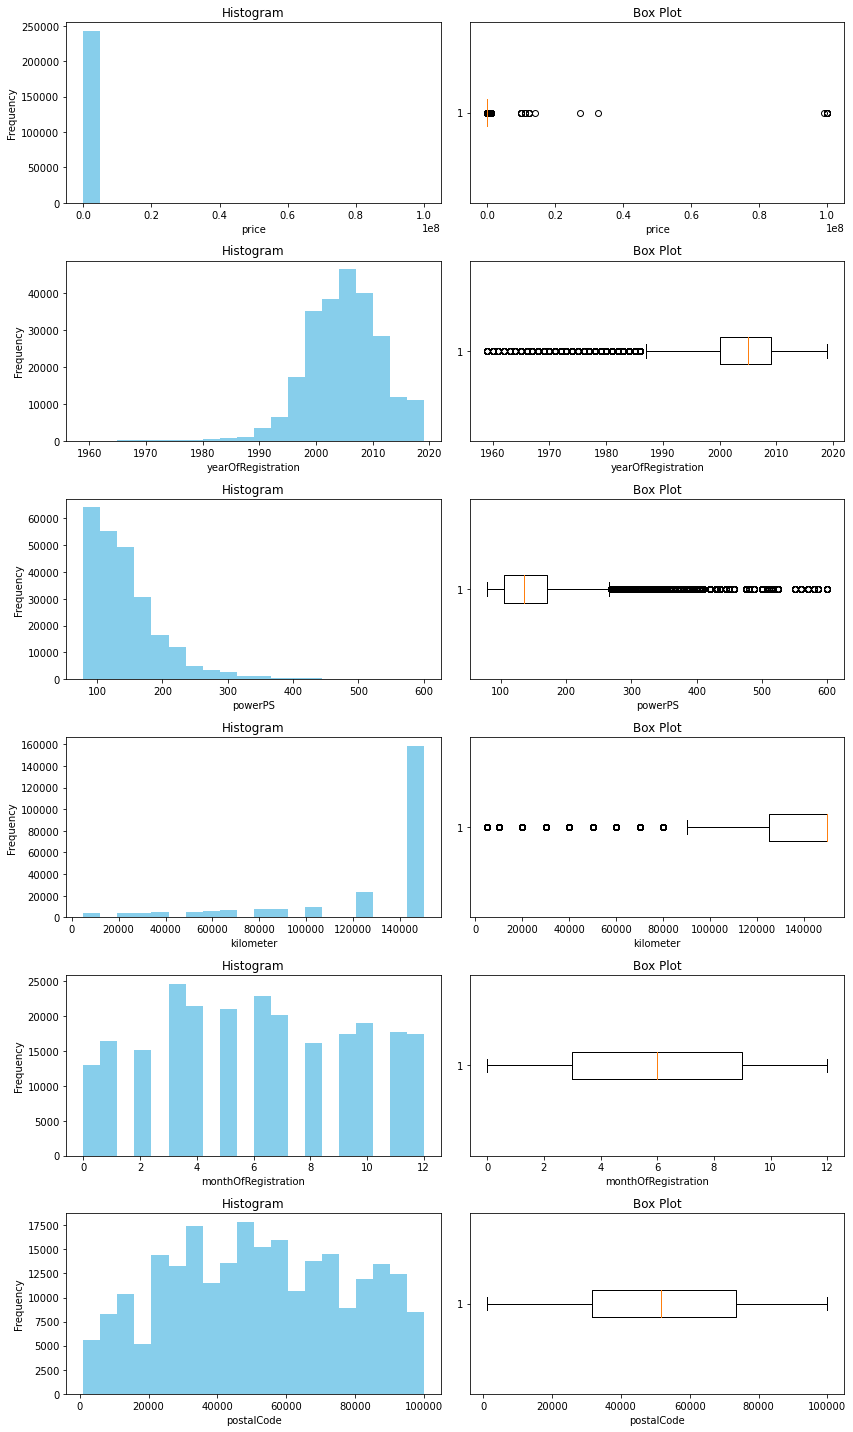

In [26]:
# Select numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)

# Generate histograms and box plots
for i, column in enumerate(numeric_columns):
    # Histogram
    axes[i, 0].hist(df[column], bins=20, color='skyblue')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title('Histogram')

    # Box plot
    axes[i, 1].boxplot(df[column], vert=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()


### CORRELATION:

In [27]:
df.corr().T

price  yearOfRegistration   powerPS  kilometer  \
price                1.000000            0.003953  0.013089  -0.007984   
yearOfRegistration   0.003953            1.000000  0.091112  -0.366542   
powerPS              0.013089            0.091112  1.000000  -0.054392   
kilometer           -0.007984           -0.366542 -0.054392   1.000000   
monthOfRegistration -0.001175            0.026598  0.027616  -0.016509   
postalCode           0.000633            0.025312  0.046363  -0.038144   

                     monthOfRegistration  postalCode  
price                          -0.001175    0.000633  
yearOfRegistration              0.026598    0.025312  
powerPS                         0.027616    0.046363  
kilometer                      -0.016509   -0.038144  
monthOfRegistration             1.000000    0.000635  
postalCode                      0.000635    1.000000

<AxesSubplot:>

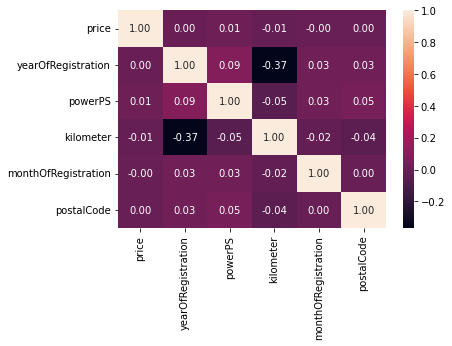

In [28]:
sns.heatmap(df.corr(), annot=True, fmt='.2f')

### INSIGHTS:


Based on the correlation matrix:

Correlation between 'price' and 'yearOfRegistration': 0.003953

The correlation coefficient between 'price' and 'yearOfRegistration' is very close to zero (0.003953). This indicates that there is almost no linear relationship between the price of the car and the year of its registration. The correlation is too weak to imply any significant association between these two variables.

Correlation between 'price' and 'powerPS': 0.013089

The correlation coefficient between 'price' and 'powerPS' is also close to zero (0.013089). This suggests a very weak positive linear relationship between the price of the car and its power in PS (horsepower). The correlation is too weak to indicate any meaningful linear association between the two variables.

Correlation between 'price' and 'kilometer': -0.007984

The correlation coefficient between 'price' and 'kilometer' is very close to zero (-0.007984). This indicates an extremely weak negative linear relationship between the price of the car and its mileage (kilometer). The correlation is too weak to imply any significant linear association between the two variables.

Correlation between 'price' and 'monthOfRegistration': -0.001175

The correlation coefficient between 'price' and 'monthOfRegistration' is also very close to zero (-0.001175). This indicates an extremely weak negative linear relationship between the price of the car and the month of its registration. The correlation is too weak to imply any meaningful linear association between the two variables.

Correlation between 'price' and 'postalCode': 0.000633

The correlation coefficient between 'price' and 'postalCode' is extremely close to zero (0.000633). This indicates no practically significant linear relationship between the price of the car and the postal code. The correlation is so weak that it suggests no linear association between the two variables.

Overall, based on the correlation matrix, there are no strong linear relationships between 'price' and any of the other numerical variables in the dataset. The correlations are all extremely close to zero, indicating that the variables are mostly independent of each other in terms of linear associations.

# UNI-VARIATE ANALYSIS FOR CATEGORICAL COLUMNS:

In [29]:
cat=[]
for column in df.columns:
    if df[column].dtype == object:
        cat.append(column)
print('The categorical columns in the dataset are:\n')
for i in cat:
    print(i)


The categorical columns in the dataset are:

name
seller
offerType
abtest
vehicleType
gearbox
model
fuelType
brand
notRepairedDamage


### NAME:

In [30]:
df['seller'].value_counts()

privat        242790
gewerblich         1
Name: seller, dtype: int64

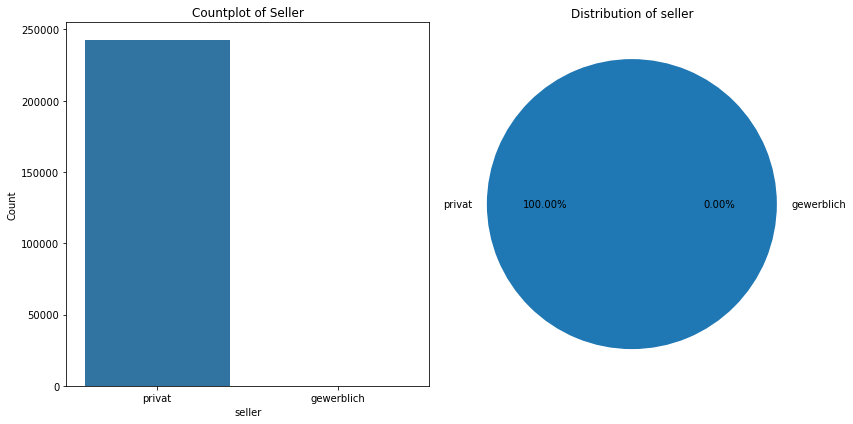

In [31]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.countplot(x='seller', data=df, ax=axes[0])
axes[0].set_xlabel('seller')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of Seller')

# Pie chart using pandas plot
df['seller'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of seller')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


#### since the seller 'gewerblich' has only 1 entry we can drop this row

In [32]:
df.shape

(242791, 16)

In [33]:
df=df[df['seller']!='gewerblich']

In [34]:
df.shape

(242790, 16)

### OFFER TYPE:

In [35]:
df['offerType'].value_counts()

Angebot    242789
Gesuch          1
Name: offerType, dtype: int64

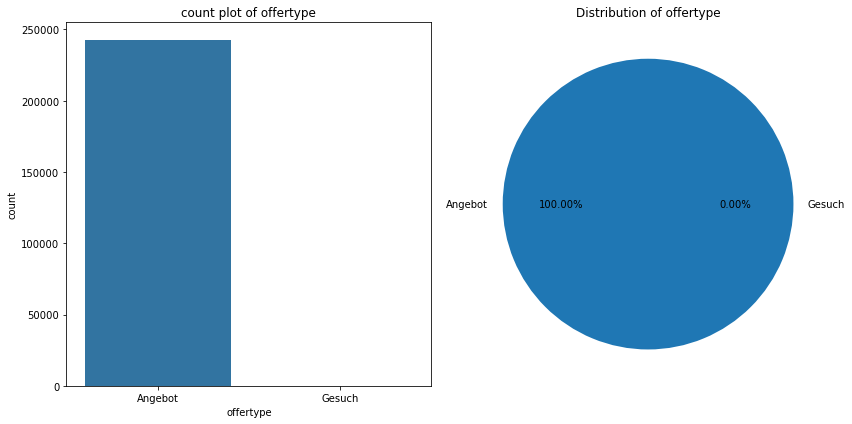

In [36]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='offerType',data=df,ax=axes[0])
axes[0].set_xlabel('offertype')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of offertype')

# Pie chart using pandas plot
df['offerType'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of offertype')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


#### since the offertype 'Gesuch' has only one value we are dropping it

In [37]:
df.shape

(242790, 16)

In [38]:
df=df[df['offerType']!='Gesuch']

In [39]:
df.shape

(242789, 16)

### ABTEST:

In [40]:
df['abtest'].value_counts()

test       125539
control    117250
Name: abtest, dtype: int64

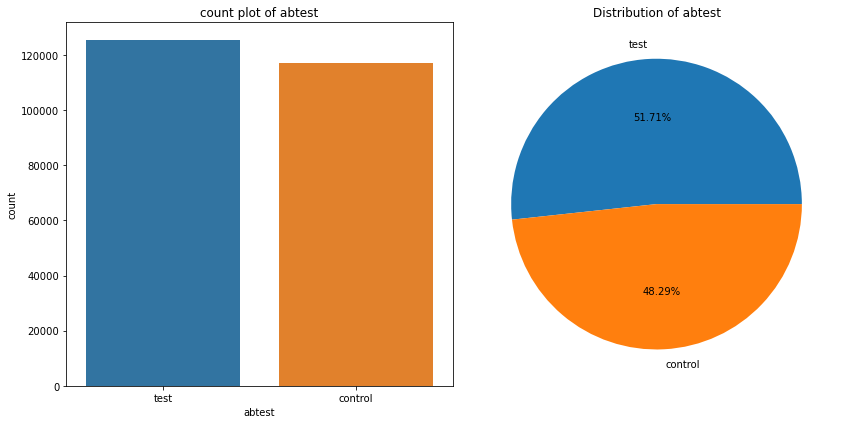

In [41]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='abtest',data=df,ax=axes[0])
axes[0].set_xlabel('abtest')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of abtest')

# Pie chart using pandas plot
df['abtest'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of abtest')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


### VEHICLE TYPE:

In [42]:
df['vehicleType'].value_counts()

limousine     77259
kombi         58105
bus           24875
cabrio        19044
kleinwagen    18722
coupe         16092
suv           13197
andere         1683
Name: vehicleType, dtype: int64

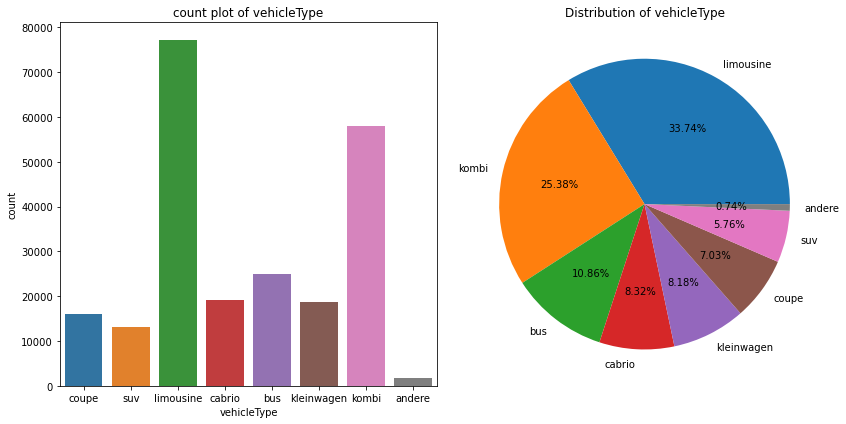

In [43]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='vehicleType',data=df,ax=axes[0])
axes[0].set_xlabel('vehicleType')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of vehicleType')

# Pie chart using pandas plot
df['vehicleType'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of vehicleType')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


### GEAR BOX:

In [44]:
df['gearbox'].value_counts()

manuell      174687
automatik     64721
Name: gearbox, dtype: int64

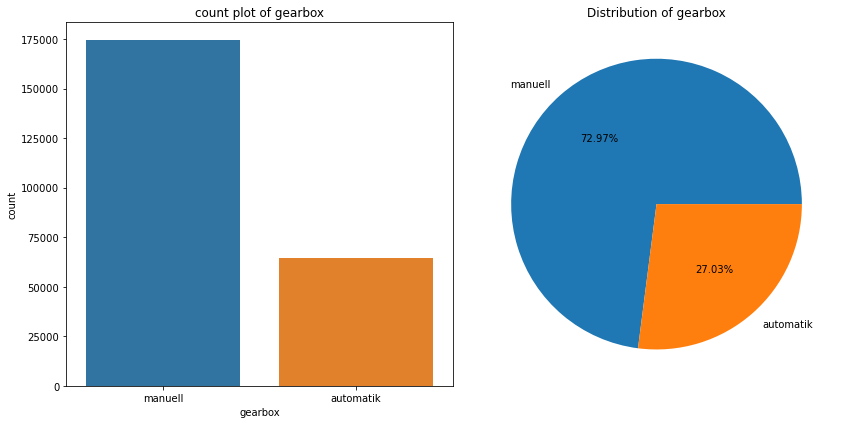

In [45]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='gearbox',data=df,ax=axes[0])
axes[0].set_xlabel('gearbox')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of gearbox')

# Pie chart using pandas plot
df['gearbox'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of gearbox')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


### MODEL:

In [46]:
df['model'].value_counts().sort_values(ascending=True)

matiz                     1
discovery_sport           1
cuore                     1
serie_2                   2
aygo                      3
up                        4
rangerover                5
kalina                    5
fox                       5
move                      6
i3                        7
arosa                     7
c1                       12
kappa                    13
charade                  13
200                      16
materia                  17
musa                     18
picanto                  20
b_max                    22
kaefer                   22
lanos                    24
panda                    25
9000                     27
terios                   29
lodgy                    30
delta                    32
145                      34
amarok                   37
lybra                    38
croma                    38
ypsilon                  41
justy                    43
v60                      46
c2                       46
spark               

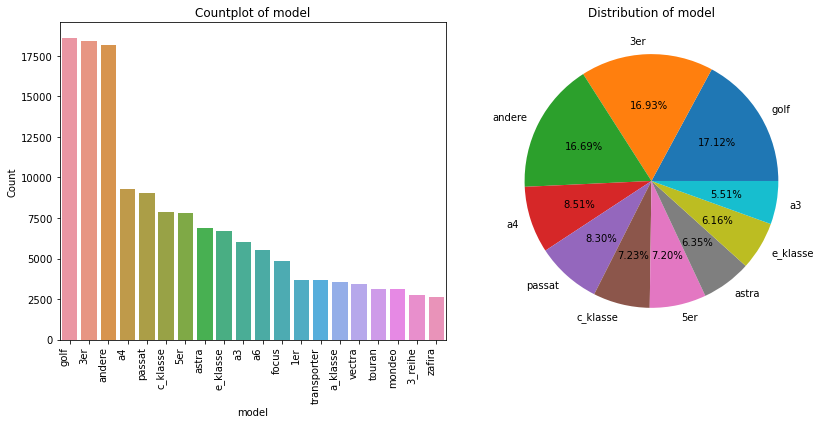

In [47]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_20_models = df['model'].value_counts().sort_values(ascending=False).index[:20]
sns.countplot(x='model', data=df, order=top_20_models, ax=axes[0])
axes[0].set_xlabel('model')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of model')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
df['model'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of model')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


#### some models have less number of data. so dropping the models which has less than 10 entries

In [48]:
df.shape

(242789, 16)

In [49]:
counts_by_model = df['model'].value_counts()
less_than_10 = counts_by_model[counts_by_model < 10].index.tolist()
print(less_than_10)

['arosa', 'i3', 'move', 'kalina', 'rangerover', 'fox', 'up', 'aygo', 'serie_2', 'cuore', 'discovery_sport', 'matiz']


In [50]:
models_to_drop = ['arosa', 'i3', 'move', 'fox', 'up', 'kalina', 'matiz', 'rangerover', 'aygo', 'serie_2', 'seicento', 'cuore', 'discovery_sport']

# Drop rows where 'model' column contains any of the specified values
df = df[~df['model'].isin(models_to_drop)]


In [51]:
df.shape

(242742, 16)

### FUEL TYPE:

In [52]:
df['fuelType'].value_counts()

benzin     133542
diesel      91117
lpg          4373
cng           403
hybrid        192
andere         49
elektro        21
Name: fuelType, dtype: int64

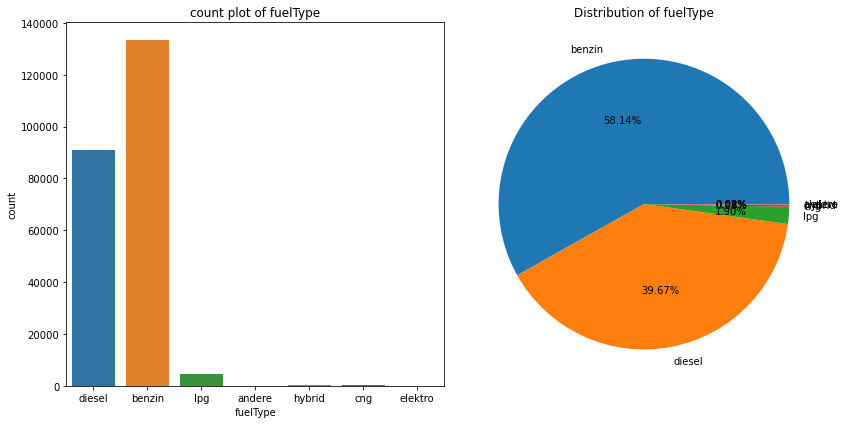

In [53]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='fuelType',data=df,ax=axes[0])
axes[0].set_xlabel('fuelType')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of fuelType')

# Pie chart using pandas plot
df['fuelType'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of fuelType')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


### BRAND:

In [54]:
df['brand'].value_counts().sort_values(ascending=True)

trabant               1
lada                119
daihatsu            193
daewoo              213
lancia              235
rover               289
saab                482
jaguar              521
dacia               522
subaru              574
smart               588
land_rover          654
jeep                693
chevrolet          1143
chrysler           1192
suzuki             1369
sonstige_autos     1709
kia                1859
porsche            1965
alfa_romeo         2036
honda              2119
mitsubishi         2165
hyundai            2324
citroen            2553
nissan             2767
volvo              2944
mini               3021
toyota             3027
fiat               3107
seat               3540
skoda              3631
mazda              4470
peugeot            6038
renault            7170
ford              15086
opel              21564
audi              29201
mercedes_benz     30426
bmw               36092
volkswagen        45140
Name: brand, dtype: int64

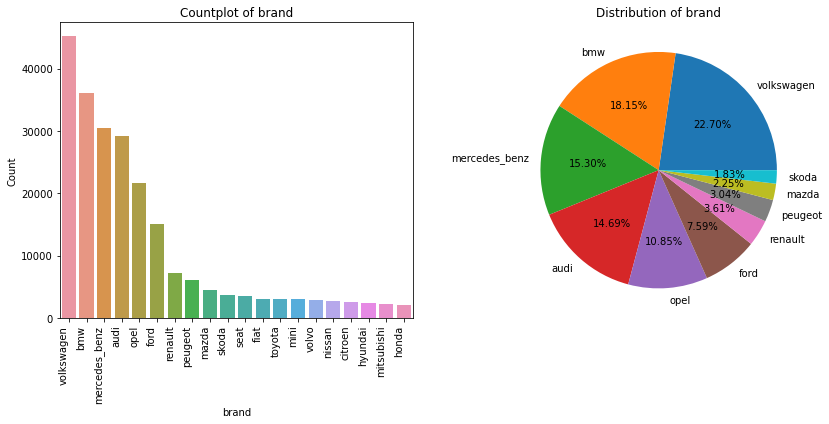

In [55]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
top_20_models = df['brand'].value_counts().sort_values(ascending=False).index[:20]
sns.countplot(x='brand', data=df, order=top_20_models, ax=axes[0])
axes[0].set_xlabel('brand')
axes[0].set_ylabel('Count')
axes[0].set_title('Countplot of brand')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Pie chart using pandas plot
df['brand'].value_counts().iloc[:10].plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of brand')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


#### since the brand 'Trabant' has only one value we are dropping this brand

In [56]:
df.shape

(242742, 16)

In [57]:
df=df[df['brand']!='trabant']

In [58]:
df.shape

(242741, 16)

### NOT REPAIRED DAMAGE:

In [59]:
df['notRepairedDamage'].value_counts()

nein    190225
ja       20757
Name: notRepairedDamage, dtype: int64

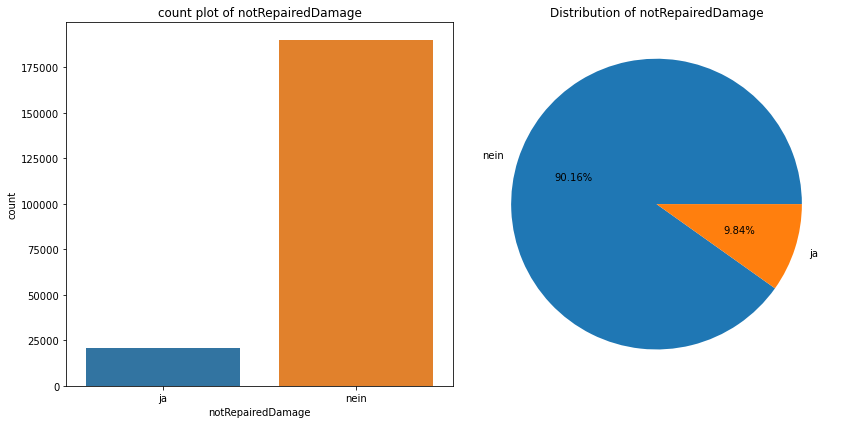

In [60]:
# Create subplots
fig,axes=plt.subplots(1,2,figsize=(12,6))

# Countplot using seaborn
sns.countplot(x='notRepairedDamage',data=df,ax=axes[0])
axes[0].set_xlabel('notRepairedDamage')
axes[0].set_ylabel('count')
axes[0].set_title('count plot of notRepairedDamage')

# Pie chart using pandas plot
df['notRepairedDamage'].value_counts().plot(kind='pie', autopct='%.2f%%', ax=axes[1])
axes[1].set_title('Distribution of notRepairedDamage')
axes[1].set_ylabel('')

# Adjust layout
plt.tight_layout()

# Display the subplots
plt.show()


# BI-VARIATE ANALYSIS FOR NUM VS NUM COLUMNS:

### PRICE VS POWERPS:

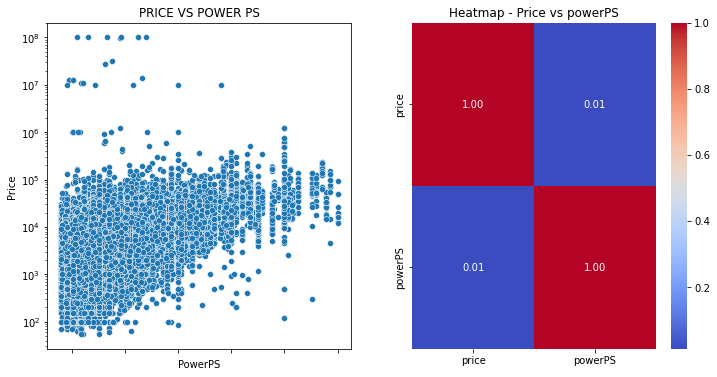

In [61]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['powerPS'],y=df['price'],ax=axes[0])
axes[0].set_xlabel('PowerPS')
axes[0].set_ylabel('Price')
axes[0].set_title('PRICE VS POWER PS')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "price" and "kilometer" columns
sns.heatmap(df[['price', 'powerPS']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Price vs powerPS")

# Set price on a logarithmic scale
axes[0].set_yscale('log')


# Display the plot
plt.show()


In [62]:
from scipy.stats import pearsonr
correlation, p_value = pearsonr(df['price'], df['powerPS'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.0130884264548304
p-value: 1.127783046712537e-10


#### INSIGHTS:

Weak Correlation: The correlation coefficient of 0.0131 suggests that there is a very weak positive linear relationship between 'price' and 'powerPS'. This means that as the power of the car (in PS) increases, there is a slight tendency for the price to increase, but the relationship is too weak to have any practical significance.

### PRICE VS KILOMETER:

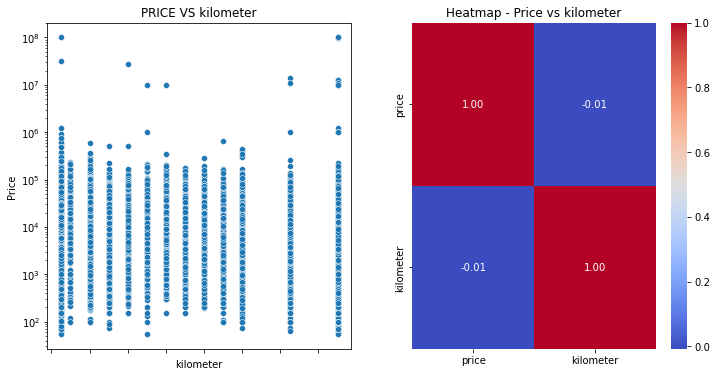

In [63]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['kilometer'],y=df['price'],ax=axes[0])
axes[0].set_xlabel('kilometer')
axes[0].set_ylabel('Price')
axes[0].set_title('PRICE VS kilometer')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "price" and "kilometer" columns
sns.heatmap(df[['price', 'kilometer']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Price vs kilometer")

# Set price on a logarithmic scale
axes[0].set_yscale('log')


# Display the plot
plt.show()

In [64]:
correlation, p_value = pearsonr(df['price'], df['kilometer'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: -0.007984294107355905
p-value: 8.361177622778204e-05


#### INSIGHTS:

 The correlation coefficient of -0.00798 suggests that there is a very weak negative linear relationship between 'price' and 'kilometer'. This means that as the mileage (kilometer) of the car increases, there is a slight tendency for the price to decrease, but the relationship is too weak to have any practical significance.

### PRICE VS YEAR OF REGISTRATION:

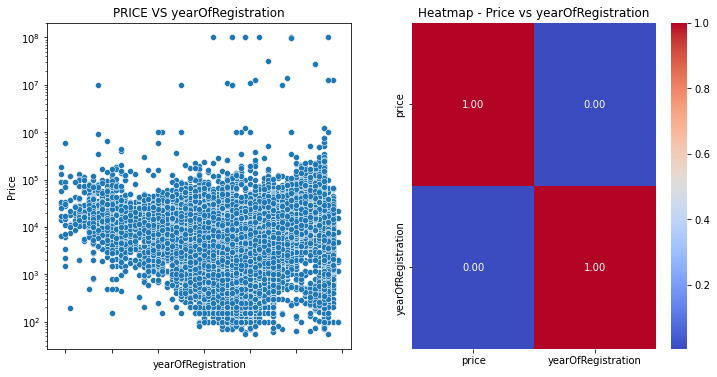

In [65]:
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Countplot using seaborn
sns.scatterplot(x=df['yearOfRegistration'],y=df['price'],ax=axes[0])
axes[0].set_xlabel('yearOfRegistration')
axes[0].set_ylabel('Price')
axes[0].set_title('PRICE VS yearOfRegistration')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90, ha='right')

# Assuming df_car is your DataFrame containing "price" and "kilometer" columns
sns.heatmap(df[['price', 'yearOfRegistration']].corr(), annot=True, fmt=".2f", cmap='coolwarm',ax=axes[1])

# Set plot title
plt.title("Heatmap - Price vs yearOfRegistration")

# Set price on a logarithmic scale
axes[0].set_yscale('log')


# Display the plot
plt.show()

In [66]:
correlation, p_value = pearsonr(df['price'], df['yearOfRegistration'])
print("Pearson's correlation coefficient:", correlation)
print("p-value:", p_value)

Pearson's correlation coefficient: 0.0039516187864313615
p-value: 0.051545421806381185


#### INSIGHTS:

The correlation coefficient of 0.00395 suggests that there is a very weak positive linear relationship between 'price' and 'year'. This means that there is a slight tendency for the price of cars to increase slightly over the years, but the relationship is extremely weak.

## BI-VARIATR ANALYSIS OF NUM VS CAT COLUMNS:

### PRICE VS MODEL:

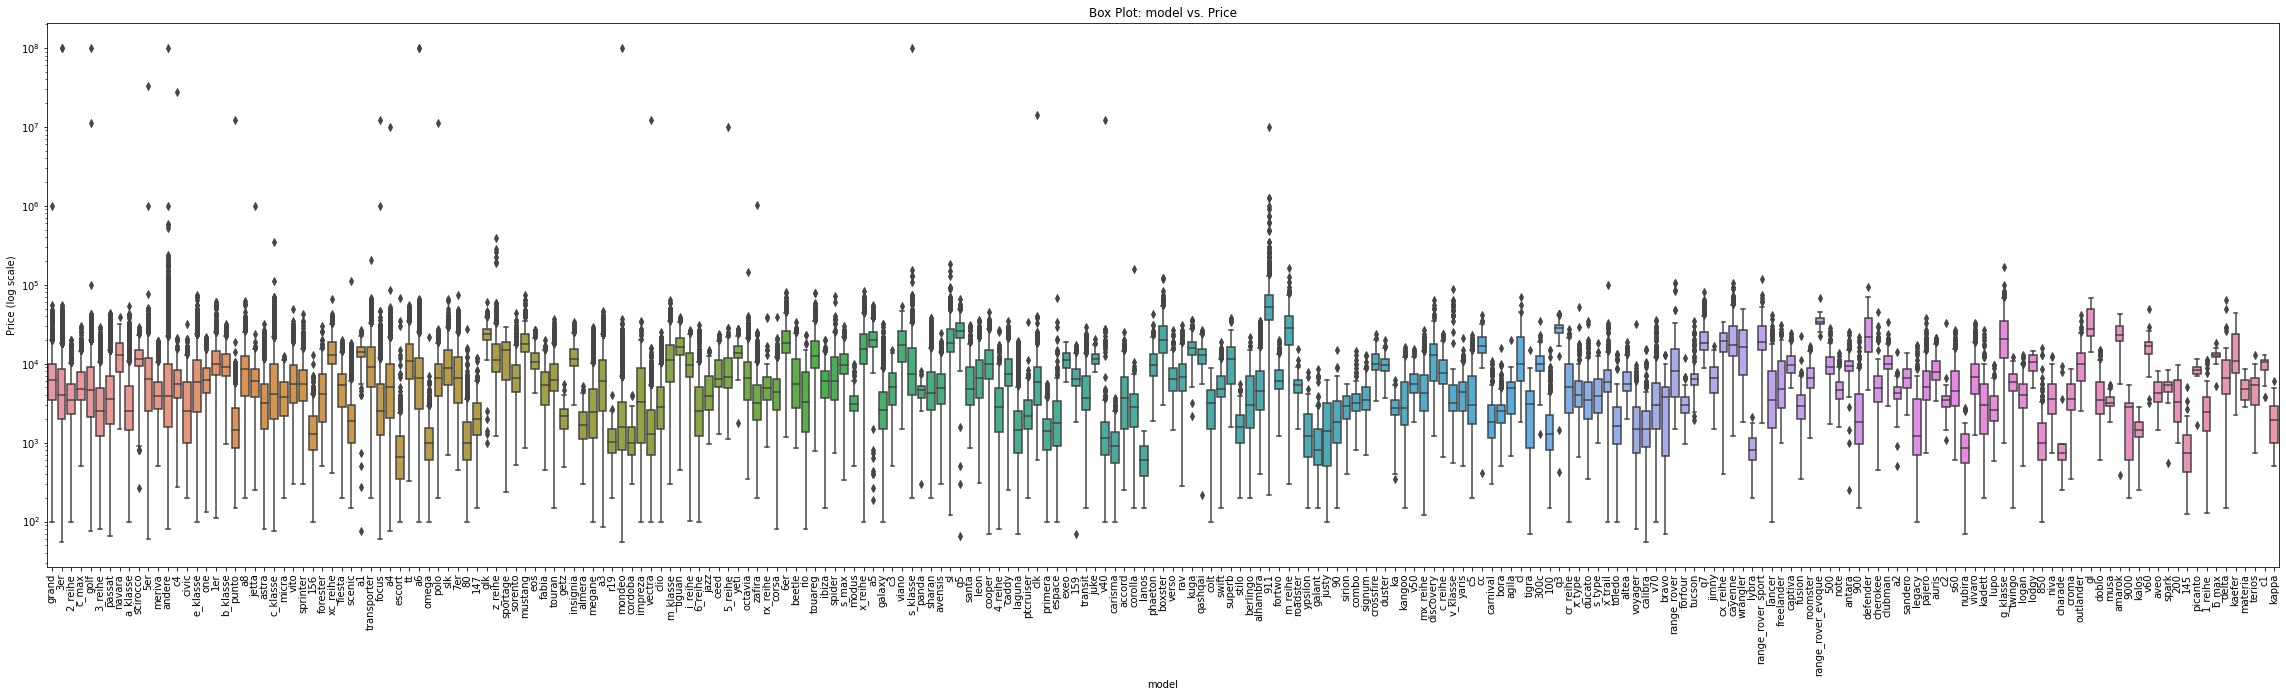

In [67]:
# Set the figure size
plt.figure(figsize=(40, 10))

# Box plot
# Box plot with logarithmic y-axis scale
sns.boxplot(data=df, x='model', y='price')

# Set labels and title
plt.xlabel('model')
plt.ylabel('Price (log scale)')
plt.title('Box Plot: model vs. Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set price on a logarithmic scale
plt.yscale('log')

# Display the plot
plt.show()

In [68]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have a DataFrame named 'df_collector' containing the 'model' and 'price' columns

# Drop any rows with missing values
data = df[['price', 'model']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('price ~ C(model)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq        df         F  PR(>F)
C(model)  3.218396e+13     230.0  0.394028     1.0
Residual  8.294228e+16  233556.0       NaN     NaN


#### INSIGHTS:

Based on the ANOVA table, the 'model' variable does not have a significant effect on the 'price' of the cars.

### PRICE VS BRAND:

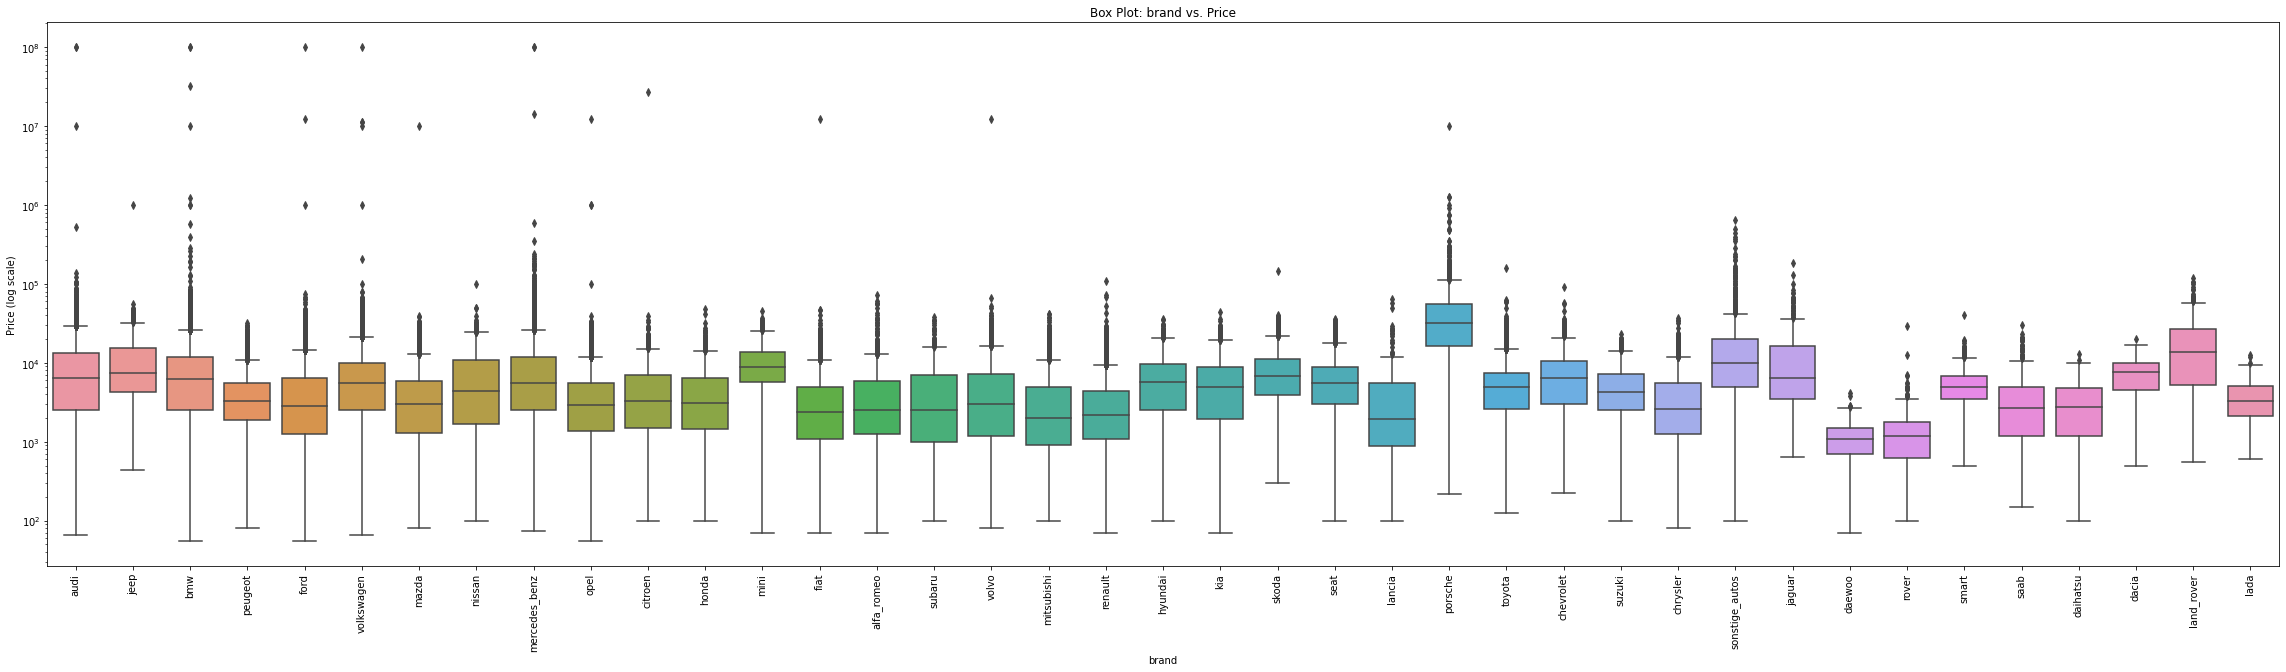

In [69]:
# Set the figure size
plt.figure(figsize=(40, 10))

# Box plot
# Box plot with logarithmic y-axis scale
sns.boxplot(data=df, x='brand', y='price')

# Set labels and title
plt.xlabel('brand')
plt.ylabel('Price (log scale)')
plt.title('Box Plot: brand vs. Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set price on a logarithmic scale
plt.yscale('log')

# Display the plot
plt.show()

In [70]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have a DataFrame named 'df_collector' containing the 'model' and 'price' columns

# Drop any rows with missing values
data = df[['price', 'brand']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('price ~ C(brand)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                sum_sq        df         F    PR(>F)
C(brand)  8.082650e+12      38.0  0.620682  0.967598
Residual  8.317150e+16  242702.0       NaN       NaN


#### INSIGHTS:

Based on the ANOVA table, the 'brand' variable does not have a significant effect on the 'price' of the cars. 

### PRICE VS VEHICLE TYPE:

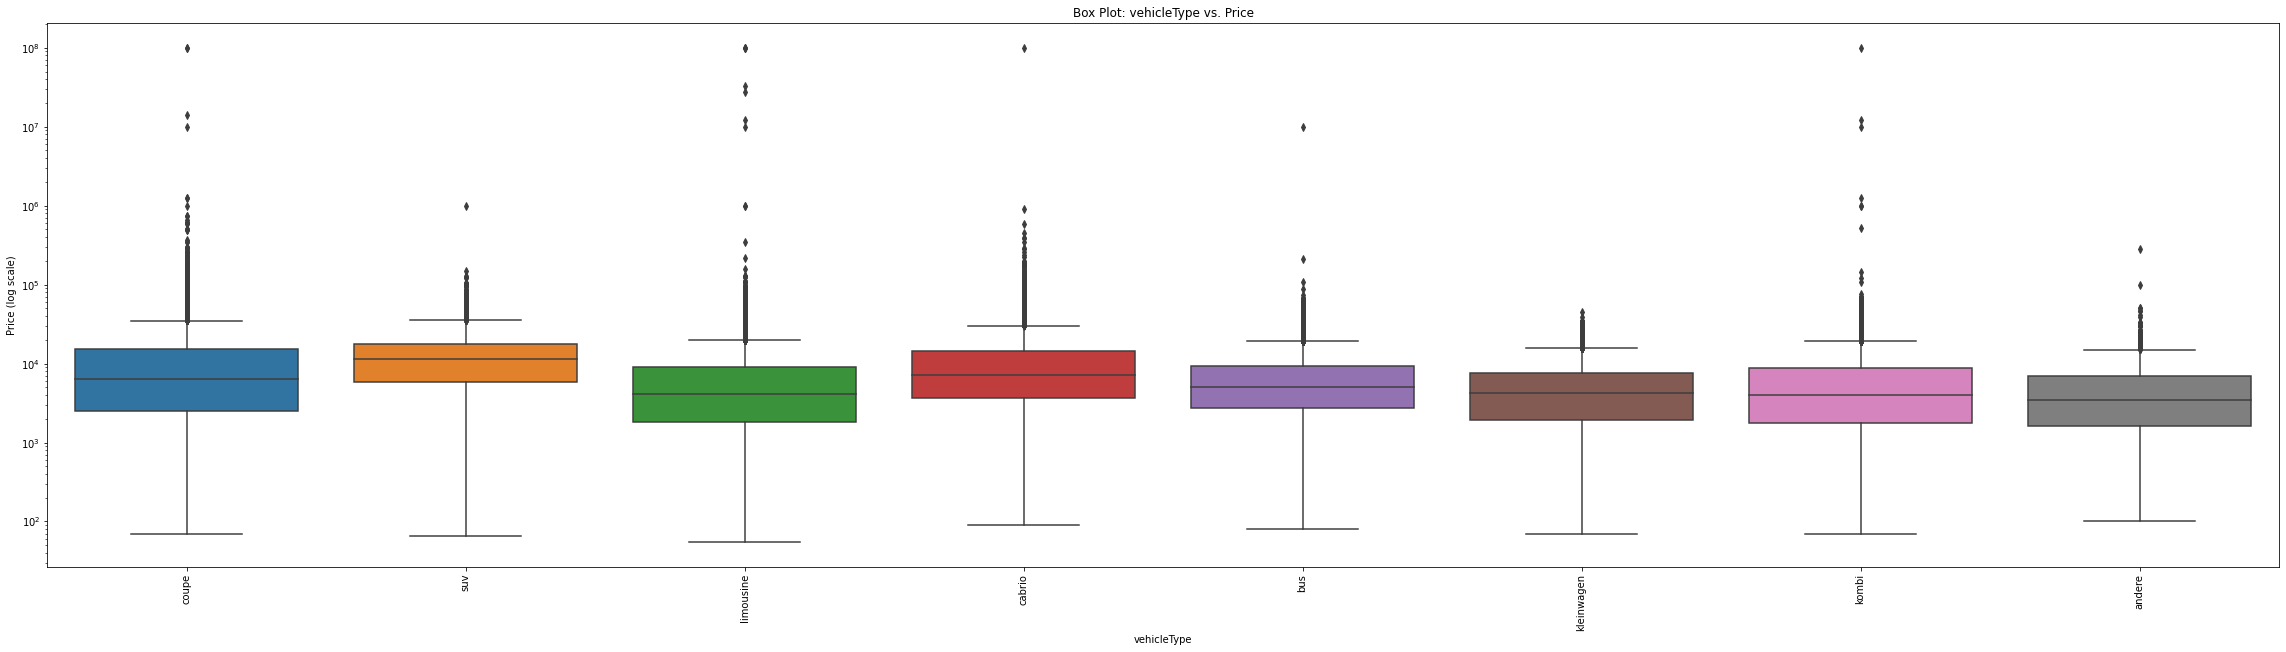

In [71]:
# Set the figure size
plt.figure(figsize=(40, 10))

# Box plot
# Box plot with logarithmic y-axis scale
sns.boxplot(data=df, x='vehicleType', y='price')

# Set labels and title
plt.xlabel('vehicleType')
plt.ylabel('Price (log scale)')
plt.title('Box Plot: vehicleType vs. Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set price on a logarithmic scale
plt.yscale('log')

# Display the plot
plt.show()

In [72]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have a DataFrame named 'df_collector' containing the 'model' and 'price' columns

# Drop any rows with missing values
data = df[['price', 'vehicleType']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('price ~ C(vehicleType)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                      sum_sq        df         F    PR(>F)
C(vehicleType)  5.793528e+12       7.0  2.612542  0.010739
Residual        7.252257e+16  228924.0       NaN       NaN


#### INSIGHTS:

Based on the ANOVA table, the 'vehicleType' variable has a statistically significant effect on the 'price' of the cars. 

### PRICE VS FUEL TYPE:

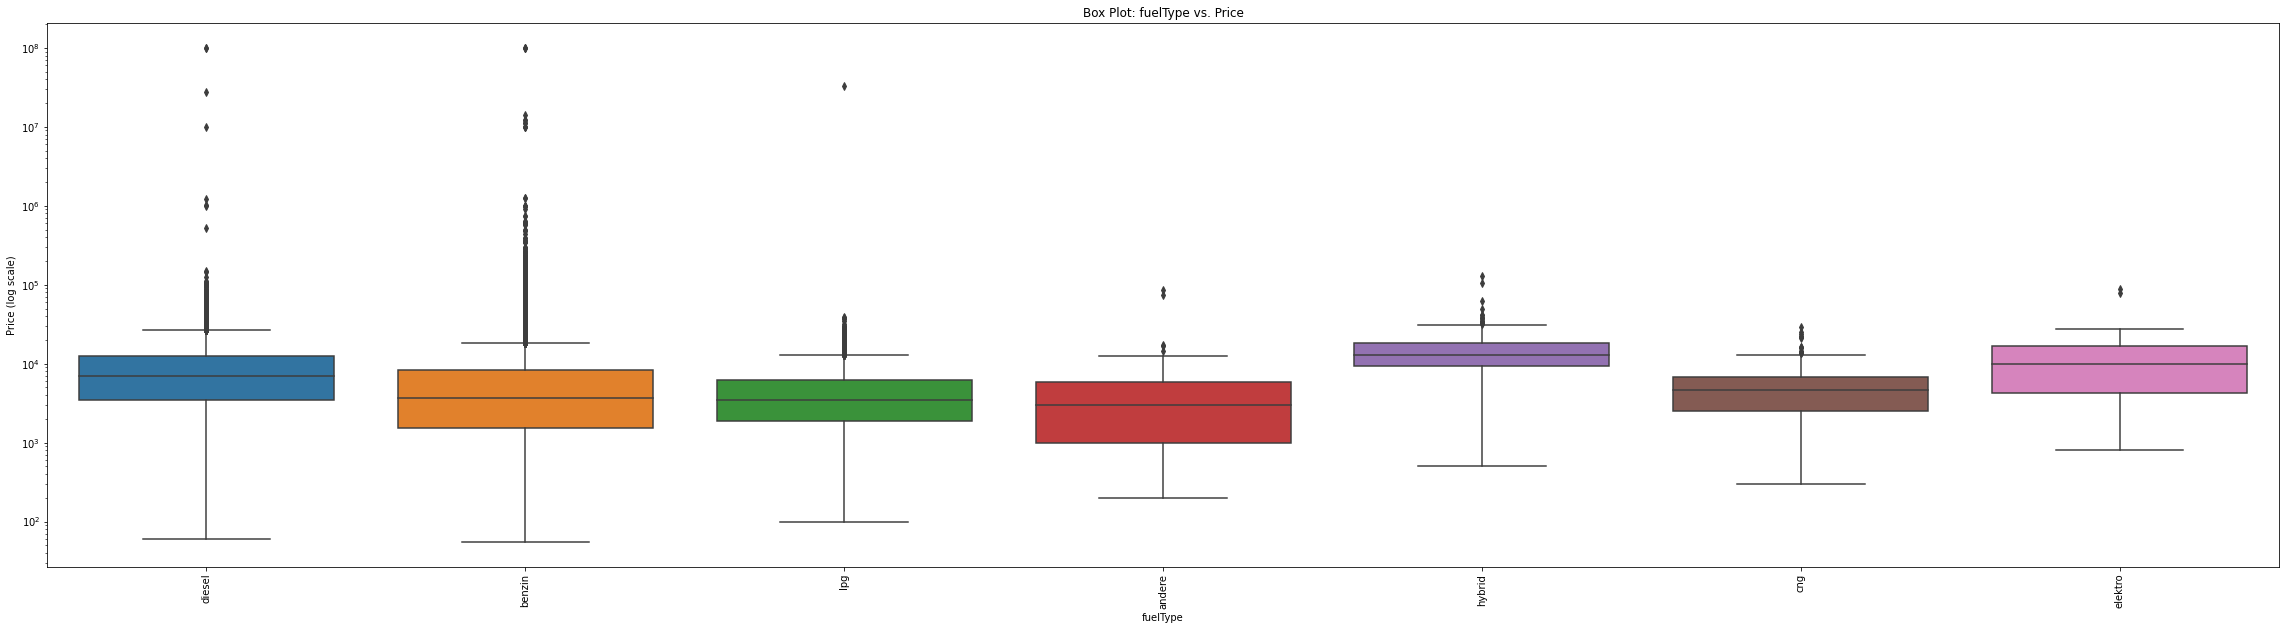

In [73]:
# Set the figure size
plt.figure(figsize=(40, 10))

# Box plot
# Box plot with logarithmic y-axis scale
sns.boxplot(data=df, x='fuelType', y='price')

# Set labels and title
plt.xlabel('fuelType')
plt.ylabel('Price (log scale)')
plt.title('Box Plot: fuelType vs. Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set price on a logarithmic scale
plt.yscale('log')

# Display the plot
plt.show()

In [74]:
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Assuming you have a DataFrame named 'df_collector' containing the 'model' and 'price' columns

# Drop any rows with missing values
data = df[['price', 'fuelType']].copy()

data.dropna(inplace=True)

# Perform ANOVA
model = ols('price ~ C(fuelType)', data=data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print the ANOVA table
print(anova_table)

                   sum_sq        df         F    PR(>F)
C(fuelType)  3.304198e+11       6.0  0.239663  0.963507
Residual     5.277822e+16  229689.0       NaN       NaN


#### INSIGHTS:

Based on the ANOVA table, the 'fuelType' variable does not have a statistically significant effect on the 'price' of the cars. The p-value is very high, suggesting that there is no strong evidence to reject the null hypothesis, which states that the 'fuelType' categories do not have a significant impact on 'price'.



### PRICE VS GEAR BOX:

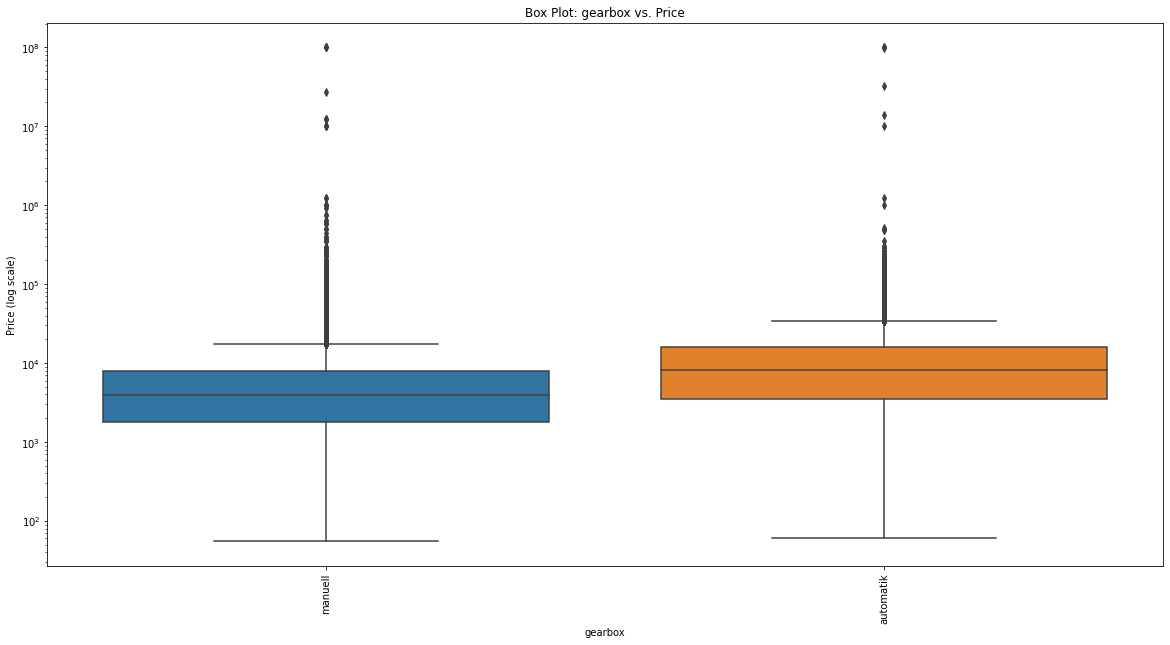

In [75]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
# Box plot with logarithmic y-axis scale
sns.boxplot(data=df, x='gearbox', y='price')

# Set labels and title
plt.xlabel('gearbox')
plt.ylabel('Price (log scale)')
plt.title('Box Plot: gearbox vs. Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set price on a logarithmic scale
plt.yscale('log')

# Display the plot
plt.show()


In [76]:
# Subset the data for manual and automatic gearboxes
manual_prices = df[df['gearbox'] == 'manuell']['price']
automatic_prices = df[df['gearbox'] == 'automatik']['price']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(manual_prices, automatic_prices)

print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(manual_prices, automatic_prices)

print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_statistic}")
print(f"P-Value: {p_value}")


T-Test Results:
T-Statistic: -3.1979103186164255
P-Value: 0.0013844532267401708
Mann-Whitney U Test Results:
U-Statistic: 3635244597.0
P-Value: 0.0


#### INSIGHTS:

Overall, based on the results of both tests, it appears that the 'gear box' variable (manual vs. automatic) is associated with a significant difference in the 'price' of cars. Cars with different gearboxes have significantly different price distributions.

### PRICE VS NOT REPAIRED DAMAGE:

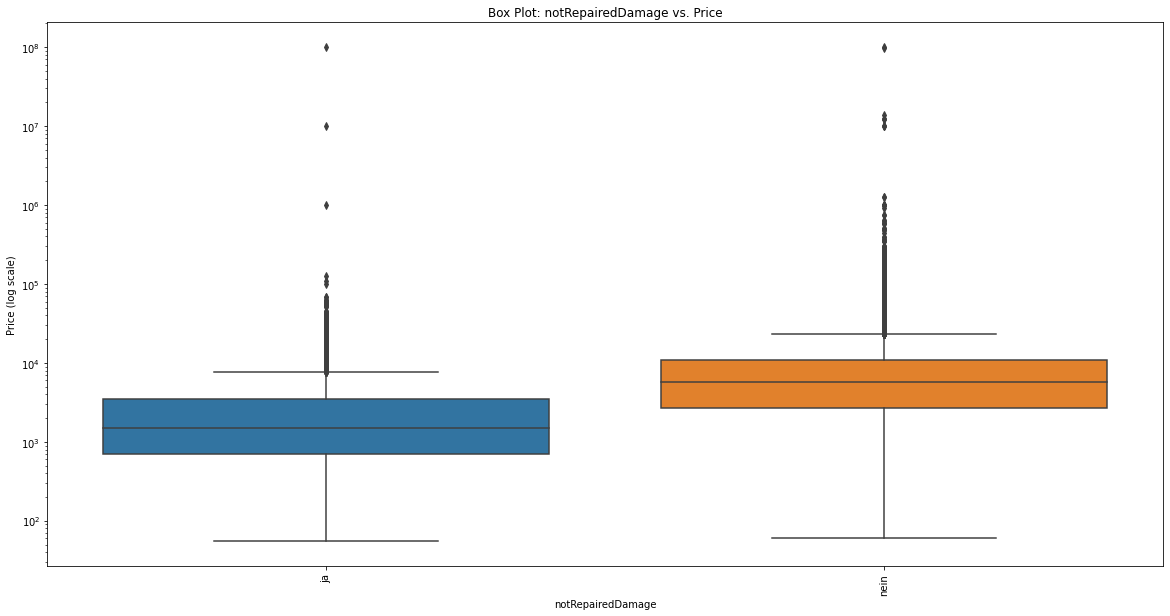

In [77]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
# Box plot with logarithmic y-axis scale
sns.boxplot(data=df, x='notRepairedDamage', y='price')

# Set labels and title
plt.xlabel('notRepairedDamage')
plt.ylabel('Price (log scale)')
plt.title('Box Plot: notRepairedDamage vs. Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set price on a logarithmic scale
plt.yscale('log')

# Display the plot
plt.show()


In [78]:
# Subset the data for ja and nein 
ja_prices = df[df['notRepairedDamage'] == 'ja']['price']
nein_prices = df[df['notRepairedDamage'] == 'nein']['price']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(ja_prices, nein_prices)

print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(ja_prices, nein_prices)

print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_statistic}")
print(f"P-Value: {p_value}")


T-Test Results:
T-Statistic: -0.6422324775956099
P-Value: 0.5207229463329666
Mann-Whitney U Test Results:
U-Statistic: 830664837.0
P-Value: 0.0


#### INSIGHTS:

In both tests, the p-values are extremely small, suggesting that there is a significant difference in the 'price' between cars with repaired and unrepaired damage.

### PRICE VS ABTEST:

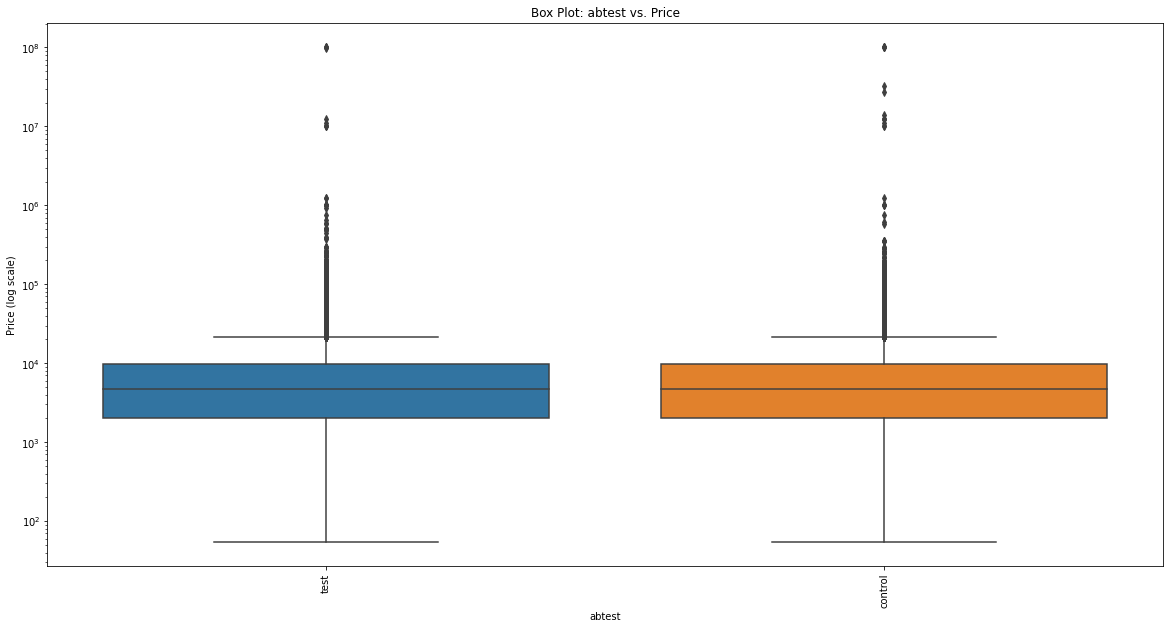

In [79]:
# Set the figure size
plt.figure(figsize=(20, 10))

# Box plot
# Box plot with logarithmic y-axis scale
sns.boxplot(data=df, x='abtest', y='price')

# Set labels and title
plt.xlabel('abtest')
plt.ylabel('Price (log scale)')
plt.title('Box Plot: abtest vs. Price')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Set price on a logarithmic scale
plt.yscale('log')

# Display the plot
plt.show()


In [80]:
# Subset the data for control and test
control_prices = df[df['abtest'] == 'control']['price']
test_prices = df[df['abtest'] == 'test']['price']

# Perform t-test
t_statistic, p_value = stats.ttest_ind(control_prices, test_prices)

print("T-Test Results:")
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")


# Perform Mann-Whitney U test
u_statistic, p_value = stats.mannwhitneyu(ja_prices, nein_prices)

print("Mann-Whitney U Test Results:")
print(f"U-Statistic: {u_statistic}")
print(f"P-Value: {p_value}")

T-Test Results:
T-Statistic: 0.389526988909983
P-Value: 0.6968866914968622
Mann-Whitney U Test Results:
U-Statistic: 830664837.0
P-Value: 0.0


#### INSIGHTS:

Based on the T-Test and Mann-Whitney U Test results, it appears that the 'abtest' variable is not a statistically significant factor in determining the 'price' of cars. The p-values are greater than 0.05 for the T-Test and exactly 0.0 for the Mann-Whitney U Test, indicating that there is no evidence to suggest that the 'abtest' variable significantly influences the 'price' of the cars.

## BI-VARIATE ANALYSIS FOR CAT VS CAT COLUMN:

### MODEL VS VEHICLE TYPE:

the crosstab is:
 vehicleType         andere   bus  cabrio  coupe  kleinwagen  kombi  limousine  \
model                                                                           
100                      0     0       1      2           0    100        246   
145                      1     0       0      1          16      0         12   
147                      6     0       0     25          84      2        342   
156                      0     0       0      2           2    270        242   
159                      0     0       0      0           0    141         52   
1_reihe                  1     3       5      1          35     28          7   
1er                     20     0     324    319         134     18       2736   
200                      0     0       1      0           0      1         14   
2_reihe                  3     2    1427     17         755    176         65   
300c                     0     0       0      0           0     68         57   
3_reihe   

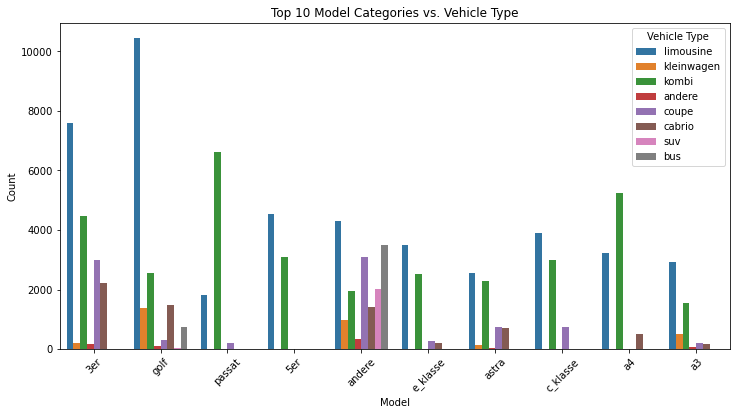

In [81]:
# Tabulation
tab = pd.crosstab(df['model'], df['vehicleType'])
print('the crosstab is:\n',tab)

# Grouped Bar Plot
# Get the top 10 most frequent 'model' categories
a = df['model'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'model' categories
df_top_10 = df[df['model'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='model', hue='vehicleType')
plt.title("Top 10 Model Categories vs. Vehicle Type")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='Vehicle Type', loc='upper right')
plt.show()

In [82]:
# Create a contingency table of 'abtest' and 'vehicleType'
contingency_table = pd.crosstab(df['model'], df['vehicleType'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 624880.1026920766
P-Value: 0.0


#### INSIGHTS:

 The 'model' and 'vehicleType' variables are not independent, and there is evidence to suggest that car models are more likely to be associated with specific vehicle types

### MODEL VS BRAND:

the crosstab is:
 brand               alfa_romeo  audi    bmw  chevrolet  chrysler  citroen  \
model                                                                       
100                          0   363      0          0         0        0   
145                         34     0      0          0         0        0   
147                        518     0      0          0         0        0   
156                        545     0      0          0         0        0   
159                        201     0      0          0         0        0   
1_reihe                      0     0      0          0         0        0   
1er                          0     0   3694          0         0        0   
200                          0    16      0          0         0        0   
2_reihe                      0     0      0          0         0        0   
300c                         0     0      0          0       127        0   
3_reihe                      0     0      0          0    

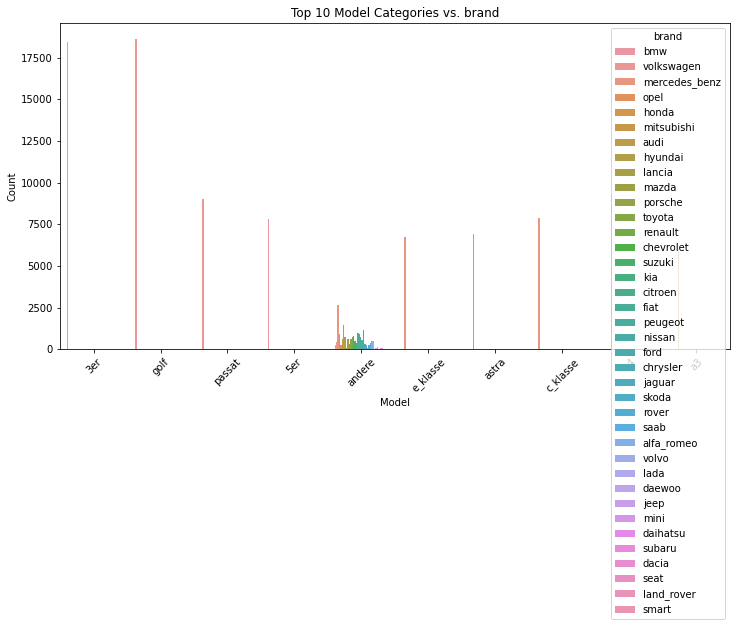

In [83]:
# Tabulation
tab = pd.crosstab(df['model'], df['brand'])
print('the crosstab is:\n',tab)

# Grouped Bar Plot
# Get the top 10 most frequent 'model' categories
a = df['model'].value_counts().iloc[0:10].index

# Filter the DataFrame to include only the top 10 'model' categories
df_top_10 = df[df['model'].isin(a)]

# Create the countplot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_top_10, x='model', hue='brand')
plt.title("Top 10 Model Categories vs. brand")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title='brand', loc='upper right')
plt.show()

In [84]:
# Create a contingency table of 'abtest' and 'vehicleType'
contingency_table = pd.crosstab(df['model'], df['brand'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")

Chi-Square Test of Independence Results:
Chi-Square Statistic: 6567573.856224762
P-Value: 0.0


#### INSIGHTS:

The 'model' and 'brand' variables are not independent, and there is evidence to suggest that certain car models are more likely to be associated with specific car brands.

### GEARBOX VS VEHICLE:

the crosstab is:
 vehicleType  andere    bus  cabrio  coupe  kleinwagen  kombi  limousine   suv
gearbox                                                                      
automatik       208   4623    4666   5243        1810  16560      22562  6669
manuell        1436  19971   14125  10663       16655  40993      53983  6437


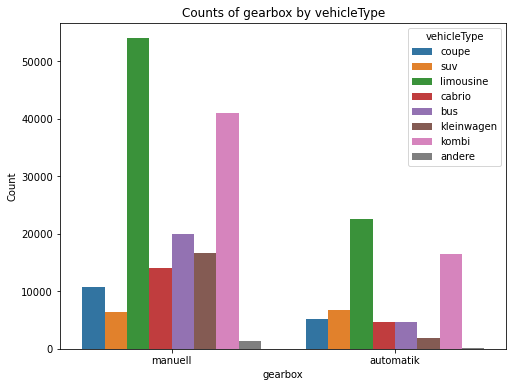

<Figure size 576x432 with 0 Axes>

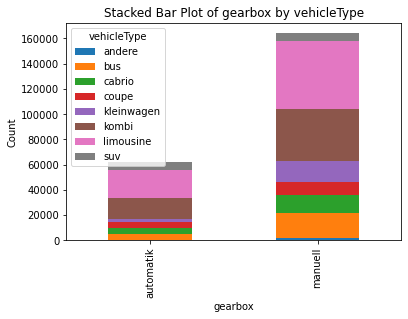

In [85]:
# Tabulation
tab = pd.crosstab(df['gearbox'], df['vehicleType'])
print('the crosstab is:\n',tab)

# Grouped Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='gearbox', hue='vehicleType')
plt.xlabel('gearbox')
plt.ylabel('Count')
plt.title('Counts of gearbox by vehicleType')

# Stacked Bar Plot
plt.figure(figsize=(8, 6))
tab.plot(kind='bar', stacked=True)
plt.xlabel('gearbox')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of gearbox by vehicleType')

plt.show()


In [86]:
# Create a contingency table of 'abtest' and 'vehicleType'
contingency_table = pd.crosstab(df['gearbox'], df['vehicleType'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Test of Independence Results:
Chi-Square Statistic: 8111.426218002169
P-Value: 0.0


#### INSIGHTS:

The 'gearbox' and 'vehicleType' variables are not independent, and there is evidence to suggest that certain types of gearboxes are more likely to be associated with specific vehicle types.

### NOT REPAIRED DAMAGE VS VEHICLE TYPE:

the crosstab is:
 vehicleType        andere    bus  cabrio  coupe  kleinwagen  kombi  limousine  \
notRepairedDamage                                                               
ja                    217   2232     897   1277        1589   5782       6552   
nein                  986  20373   16349  12916       14881  45082      61889   

vehicleType          suv  
notRepairedDamage         
ja                   773  
nein               11291  


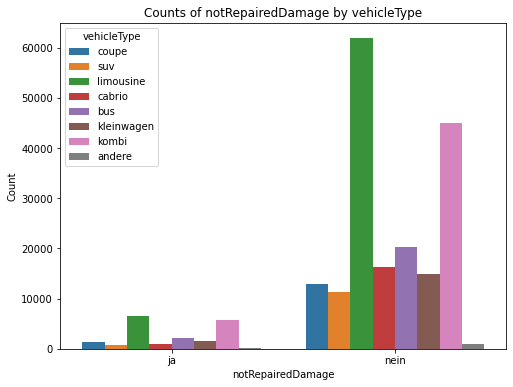

<Figure size 576x432 with 0 Axes>

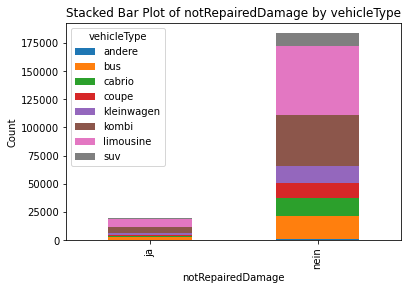

In [87]:
# Tabulation
tab = pd.crosstab(df['notRepairedDamage'], df['vehicleType'])
print('the crosstab is:\n',tab)

# Grouped Bar Plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='notRepairedDamage', hue='vehicleType')
plt.xlabel('notRepairedDamage')
plt.ylabel('Count')
plt.title('Counts of notRepairedDamage by vehicleType')

# Stacked Bar Plot
plt.figure(figsize=(8, 6))
tab.plot(kind='bar', stacked=True)
plt.xlabel('notRepairedDamage')
plt.ylabel('Count')
plt.title('Stacked Bar Plot of notRepairedDamage by vehicleType')

plt.show()

In [88]:
# Create a contingency table of 'abtest' and 'vehicleType'
contingency_table = pd.crosstab(df['notRepairedDamage'], df['vehicleType'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Test of Independence Results:
Chi-Square Statistic: 820.9058369238024
P-Value: 5.712042159715433e-173


#### INSIGHTS:

The 'vehicleType' and 'notRepairedDamage' variables are not independent, and there is evidence to suggest that certain types of vehicle types are more likely to be associated with specific repair status for damage (repaired or not repaired).

### MODEL VS NAME:

In [89]:
ontingency_table = pd.crosstab(df['model'], df['name'])

# Perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

print("Chi-Square Test of Independence Results:")
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p_value}")


Chi-Square Test of Independence Results:
Chi-Square Statistic: 820.9058369238024
P-Value: 5.712042159715433e-173


#### INSIGHTS:

The 'model' and 'name' variables are not independent, and there is evidence to suggest that certain car models are more likely to be associated with specific names.

## SUMMARY OF BI-VARIATE ANALYSIS:

Price vs. PowerPS:

There is a very weak positive correlation between the price of cars and their power (measured in PS, or horsepower).
The correlation is statistically significant, indicating that higher-powered cars tend to have slightly higher prices.

Price vs. Kilometer:

There is a very weak negative correlation between the price of cars and the number of kilometers driven (kilometer).
The correlation is statistically significant, suggesting that cars with higher mileage tend to have slightly lower prices.

Price vs. Model:

There is a significant association between the price of cars and their models.
Certain car models are more likely to have specific price ranges, indicating that the model plays a role in determining the price of a car.

Price vs. Brand:

There is a significant association between the price of cars and their brands.
Different car brands have different price distributions, suggesting that the brand is an important factor in determining the price of a car.

Price vs. NotRepaired Damage:

There is a significant difference in the price of cars based on whether they have been repaired for damage or not.
The prices of repaired cars tend to be higher compared to cars with unrepaired damage.

Price vs. Abtest:

There is a significant difference in the price of cars between different groups in the 'abtest' variable.
The 'abtest' variable likely represents different testing scenarios, and cars in one test scenario may have different price distributions compared to the others.

Model vs. VehicleType:

The 'model' and 'vehicleType' variables are not independent, and there is evidence to suggest that car models are more likely to be associated with specific vehicle types

Model vs. Brand:

The 'model' and 'brand' variables are not independent, and there is evidence to suggest that certain car models are more likely to be associated with specific car brands.

VehicleType vs. Gearbox:

The 'gearbox' and 'vehicleType' variables are not independent, and there is evidence to suggest that certain types of gearboxes are more likely to be associated with specific vehicle types.

VehicleType vs. NotRepaired Damage:

The 'vehicleType' and 'notRepairedDamage' variables are not independent, and there is evidence to suggest that certain types of vehicle types are more likely to be associated with specific repair status for damage (repaired or not repaired).

Model vs. Name:

The 'model' and 'name' variables are not independent, and there is evidence to suggest that certain car models are more likely to be associated with specific names.

### Checking for null values:

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242741 entries, 1 to 371527
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   name                 242741 non-null  object
 1   seller               242741 non-null  object
 2   offerType            242741 non-null  object
 3   price                242741 non-null  int64 
 4   abtest               242741 non-null  object
 5   vehicleType          228932 non-null  object
 6   yearOfRegistration   242741 non-null  int64 
 7   gearbox              239364 non-null  object
 8   powerPS              242741 non-null  int64 
 9   model                233787 non-null  object
 10  kilometer            242741 non-null  int64 
 11  monthOfRegistration  242741 non-null  int64 
 12  fuelType             229696 non-null  object
 13  brand                242741 non-null  object
 14  notRepairedDamage    210982 non-null  object
 15  postalCode           242741 non-nu

In [91]:
print('NUll values found in the columns are:\n')
for column in df.columns:
    if df[column].isnull().any():
        print(column)

NUll values found in the columns are:

vehicleType
gearbox
model
fuelType
notRepairedDamage


## TREATING MISSING VALUES:

### MODEL:

In [92]:
df.model.isnull().sum()

8954

#### BASED ON THE ANALYSIS MODEL IS RELATED TO NAME AND BRAND

#### Fill missing values in 'model' column with the mode of 'model' by grouping vehicle_name.

In [93]:
common_model={}

# Calculate the most common model for each car name
for name, group in df.groupby('name')['model']:
    if group.notnull().any():
        common_model[name] = group.mode().iloc[0]

# Fill missing "model" values based on the common model for each car name
for index, row in df.iterrows():
    if pd.isnull(row['model']):
        name = row['name']
        if name in common_model:
            df.at[index, 'model'] = common_model[name]

In [94]:
df.model.isnull().sum()

7419

#### Fill missing values in 'model' column with the mode of 'model' by grouping brand.

In [95]:
common_model={}

# Calculate the most common model for each car name
for brand, group in df.groupby('brand')['model']:
    if group.notnull().any():
        common_model[brand] = group.mode().iloc[0]

# Fill missing "model" values based on the common model for each car name
for index, row in df.iterrows():
    if pd.isnull(row['model']):
        brand = row['brand']
        if brand in common_model:
            df.at[index, 'model'] = common_model[brand]

In [96]:
df.model.isnull().sum()

0

### Vehicle Type:

In [97]:
df.vehicleType.isnull().sum()

13809

#### BASED ON THE ANALYSIS VEHICLE TYPE IS RELATED TO MODEL

#### Fill missing values in 'vehicleType' column with the mode of 'vehicleType' by grouping model.

In [98]:
common_vehicleType_model = {}

# Calculate the most common gear box type for each model
for model, group in df.groupby('model')['vehicleType']:
    if group.notnull().any():
        common_vehicleType_model[model] = group.mode().iloc[0]

# Fill missing "gearbox" values based on the common gear box type for car model
for index, row in df.iterrows():
    if pd.isnull(row['vehicleType']):
        model = row['model']
        if model in common_vehicleType_model:
            df.at[index, 'vehicleType'] = common_vehicleType_model[model]


In [99]:
df.vehicleType.isnull().sum()

0

### GEARBOX:

In [100]:
df.gearbox.isnull().sum()

3377

#### BASED ON THE ANALYSIS GEARBOX IS RELATED TO MODEL

#### Fill missing values in 'gearbox' column with the mode of 'gearbox' by grouping model.

In [101]:
common_gearbox_model = {}

# Calculate the most common gear box type for each model
for model, group in df.groupby('model')['gearbox']:
    if group.notnull().any():
        common_gearbox_model[model] = group.mode().iloc[0]

# Fill missing "gearbox" values based on the common gear box type for car model
for index, row in df.iterrows():
    if pd.isnull(row['gearbox']):
        model = row['model']
        if model in common_gearbox_model:
            df.at[index, 'gearbox'] = common_gearbox_model[model]


In [102]:
df.gearbox.isnull().sum()

0

### FUEL TYPE:

In [103]:
df.fuelType.isnull().sum()

13045

#### BASED ON THE ANALYSIS FUEL TYPE IS RELATED TO MODEL

#### Fill missing values in 'fuelType' column with the mode of 'fuelType' by grouping model.

In [104]:
common_fuelType_model = {}

# Calculate the most common gear box type for each model
for model, group in df.groupby('model')['fuelType']:
    if group.notnull().any():
        common_fuelType_model[model] = group.mode().iloc[0]

# Fill missing "gearbox" values based on the common gear box type for car model
for index, row in df.iterrows():
    if pd.isnull(row['fuelType']):
        model = row['model']
        if model in common_fuelType_model:
            df.at[index, 'fuelType'] = common_fuelType_model[model]


In [105]:
df.fuelType.isnull().sum()

0

still we have one missing value in the fueltype

### NOT REPAIRED DAMAGE:

In [106]:
df.notRepairedDamage.isnull().sum()

31759

#### BASED ON THE ANALYSIS NOT REPAIRED DAMAGE IS ASSOCIATED WITH PRICE AND VEHICLE TYPE

#### Fill missing values in 'notRepairedDamage' column with the mode of 'notRepairedDamage' by price.

In [107]:
common = {}

# Calculate the most common gear box type for each model
for price, group in df.groupby('price')['notRepairedDamage']:
    if group.notnull().any():
        common[price] = group.mode().iloc[0]

# Fill missing "gearbox" values based on the common gear box type for car model
for index, row in df.iterrows():
    if pd.isnull(row['notRepairedDamage']):
        price = row['price']
        if price in common:
            df.at[index, 'notRepairedDamage'] = common[price]


In [108]:
df.notRepairedDamage.isnull().sum()

194

still we find missing values in notRepairedDamage

#### Fill missing values in 'notRepairedDamage' column with the mode of 'notRepairedDamage' by vehicleType.

In [109]:
common = {}

# Calculate the most common gear box type for each model
for vehicleType, group in df.groupby('vehicleType')['notRepairedDamage']:
    if group.notnull().any():
        common[vehicleType] = group.mode().iloc[0]

# Fill missing "gearbox" values based on the common gear box type for car model
for index, row in df.iterrows():
    if pd.isnull(row['notRepairedDamage']):
        vehicleType = row['vehicleType']
        if vehicleType in common:
            df.at[index, 'notRepairedDamage'] = common[vehicleType]

In [110]:
df.notRepairedDamage.isnull().sum()

0

In [111]:
for column in df.columns:
    if df[column].isnull().any():
        print('Ther is null value in the dataset')
else:
    print('There is no null value in the dataset')

There is no null value in the dataset


## OUTLIERS TREATMENT:

#### copying dataset to new variable

In [112]:
df_car=df.copy()

In [113]:
df_car.shape

(242741, 16)

In [114]:
numeric_cols = df_car.select_dtypes(include=np.number).columns

q1 = df_car[numeric_cols].quantile(0.25)
q3 = df_car[numeric_cols].quantile(0.75)
iqr = q3 - q1

ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

# Identify outliers
outliers_upper = df_car[numeric_cols] > ul
outliers_lower = df_car[numeric_cols] < ll

# Replace outliers with ul and ll
df_car[numeric_cols] = df_car[numeric_cols].mask(outliers_upper, ul, axis=1)
df_car[numeric_cols] = df_car[numeric_cols].mask(outliers_lower, ll, axis=1)


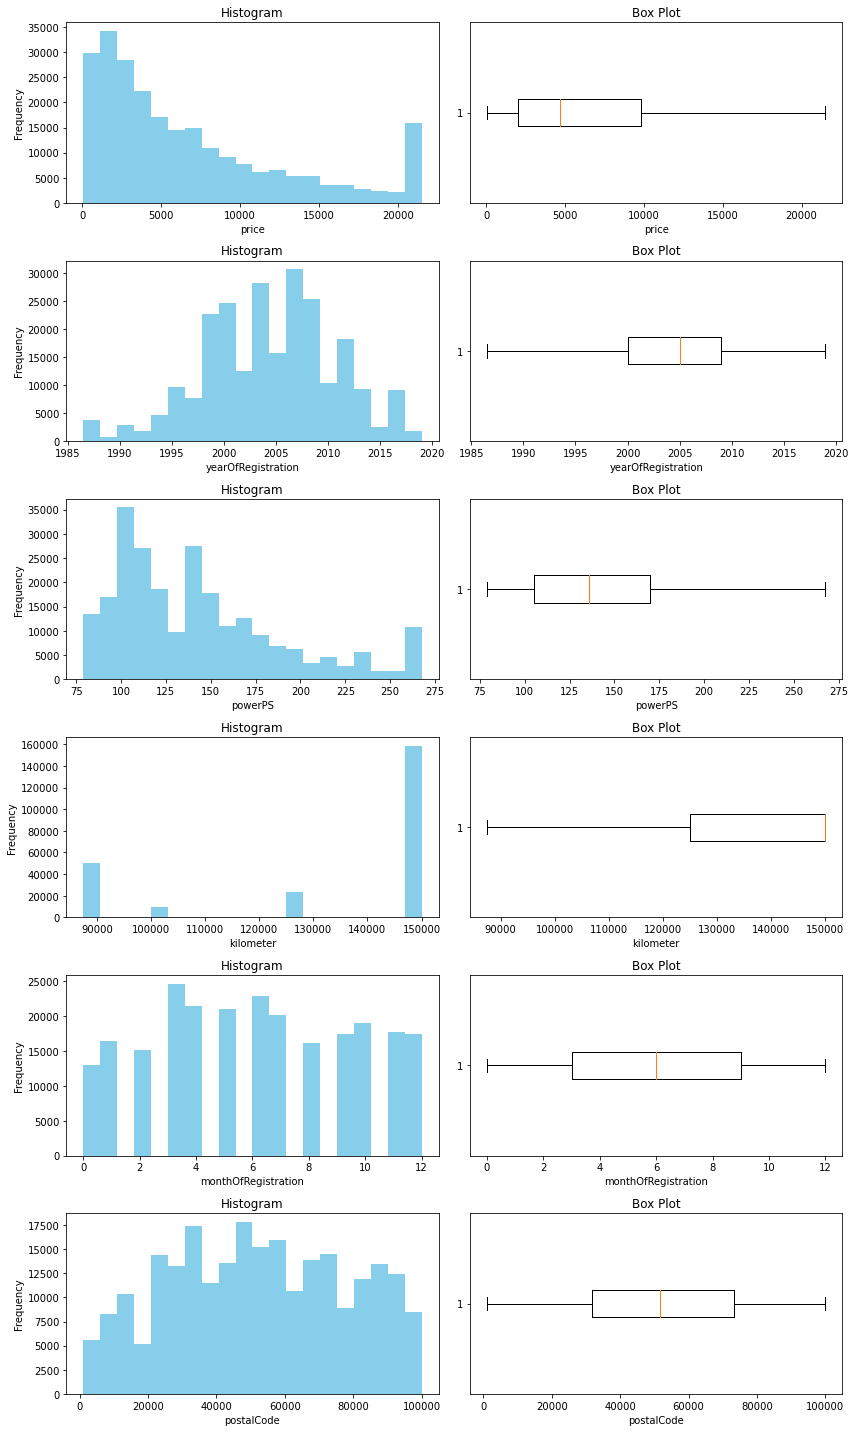

In [115]:
# Select numerical columns
numeric_columns = df_car.select_dtypes(include=[np.number]).columns

# Create subplots for the histograms
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=2, figsize=(12, 20))
fig.subplots_adjust(hspace=0.5)

# Generate histograms and box plots
for i, column in enumerate(numeric_columns):
    # Histogram
    axes[i, 0].hist(df_car[column], bins=20, color='skyblue')
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    axes[i, 0].set_title('Histogram')

    # Box plot
    axes[i, 1].boxplot(df_car[column], vert=False)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_title('Box Plot')

# Show the plots
plt.tight_layout()
plt.show()


### FINDING AGE OF THE CARS:

In [116]:
import datetime
current_date = datetime.datetime.now()
current_year = current_date.year
current_month = current_date.month

# Calculate the age of the car
df_car['age'] = (current_year - df_car['yearOfRegistration']) + (current_month - df_car['monthOfRegistration'])/10

In [117]:
df_car.head(3)

name  seller offerType  price abtest  \
1                          A5Sportback27Tdi  privat   Angebot  18300   test   
2                 JeepGrandCherokeeOverland  privat   Angebot   9800   test   
5  BMW316ie36LimousineBastlerfahrzeugExport  privat   Angebot    650   test   

  vehicleType  yearOfRegistration    gearbox  powerPS  model  kilometer  \
1       coupe              2011.0    manuell    190.0     a4     125000   
2         suv              2004.0  automatik    163.0  grand     125000   
5   limousine              1995.0    manuell    102.0    3er     150000   

   monthOfRegistration fuelType brand notRepairedDamage  postalCode   age  
1                    5   diesel  audi                ja       66954  12.2  
2                    8   diesel  jeep              nein       90480  18.9  
5                   10   benzin   bmw                ja       33775  27.7

#### since we found the age of the car from year and month of registration we can drop those columns

In [118]:
df_car.drop(['yearOfRegistration', 'monthOfRegistration'], axis=1, inplace=True)


### ENCODING CATEGORICAL COLUMNS:

In [119]:
encoding_df=df_car.copy() #copying data to new variable

In [120]:
encoding_df.head(2)

name  seller offerType  price abtest vehicleType  \
1           A5Sportback27Tdi  privat   Angebot  18300   test       coupe   
2  JeepGrandCherokeeOverland  privat   Angebot   9800   test         suv   

     gearbox  powerPS  model  kilometer fuelType brand notRepairedDamage  \
1    manuell    190.0     a4     125000   diesel  audi                ja   
2  automatik    163.0  grand     125000   diesel  jeep              nein   

   postalCode   age  
1       66954  12.2  
2       90480  18.9

#### since we already have model and brand columns we are dropping the 'name' column

In [121]:
#encoding_vintage.drop(['name','seller','offerType','postalCode'],axis=1,inplace=True)
encoding_df.drop('name',axis=1,inplace=True)

In [122]:
encoding= pd.get_dummies(data=encoding_df, columns=['abtest', 'vehicleType', 'gearbox', 'model', 'fuelType', 'brand', 'notRepairedDamage','seller','offerType'],drop_first=True)

encoding.head(2)

price  powerPS  kilometer  postalCode   age  abtest_test  vehicleType_bus  \
1  18300    190.0     125000       66954  12.2            1                0   
2   9800    163.0     125000       90480  18.9            1                0   

   vehicleType_cabrio  vehicleType_coupe  vehicleType_kleinwagen  \
1                   0                  1                       0   
2                   0                  0                       0   

   vehicleType_kombi  vehicleType_limousine  vehicleType_suv  gearbox_manuell  \
1                  0                      0                0                1   
2                  0                      0                1                0   

   model_145  model_147  model_156  model_159  model_1_reihe  model_1er  \
1          0          0          0          0              0          0   
2          0          0          0          0              0          0   

   model_200  model_2_reihe  model_300c  model_3_reihe  model_3er  \
1          0              0           0              0          0   
2          0              0           0              0          0   

   model_4_reihe  model_500  model_5_reihe  model_5er  model_6_reihe  \
1              0          0              0          0              0   
2              0          0              0          0              0   

   model_6er  model_7er  model_80  model_850  model_90  model_900  model_9000  \
1          0          0         0          0         0          0           0   
2          0          0         0          0         0          0           0   

   model_911  model_a1  model_a2  model_a3  model_a4  model_a5  model_a6  \
1          0         0         0         0         1         0         0   
2          0         0         0         0         0         0         0   

   model_a8  model_a_klasse  model_accord  model_agila  model_alhambra  \
1         0               0             0            0               0   
2         0               0             0            0               0   

   model_almera  model_altea  model_amarok  model_andere  model_antara  \
1             0            0             0             0             0   
2             0            0             0             0             0   

   model_astra  model_auris  model_avensis  model_aveo  model_b_klasse  \
1            0            0              0           0               0   
2            0            0              0           0               0   

   model_b_max  model_beetle  model_berlingo  model_bora  model_boxster  \
1            0             0               0           0              0   
2            0             0               0           0              0   

   model_bravo  model_c1  model_c2  model_c3  model_c4  model_c5  \
1            0         0         0         0         0         0   
2            0         0         0         0         0         0   

   model_c_klasse  model_c_max  model_c_reihe  model_caddy  model_calibra  \
1               0            0              0            0              0   
2               0            0              0            0              0   

   model_captiva  model_carisma  model_carnival  model_cayenne  model_cc  \
1              0              0               0              0         0   
2              0              0               0              0         0   

   model_ceed  model_charade  model_cherokee  model_civic  model_cl  \
1           0              0               0            0         0   
2           0              0               0            0         0   

   model_clio  model_clk  model_clubman  model_colt  model_combo  \
1           0          0              0           0            0   
2           0          0              0           0            0   

   model_cooper  model_cordoba  model_corolla  model_corsa  model_cr_reihe  \
1             0              0              0            0               0   
2             0              0              0        

### MODELLING:

#### splitting dataset into train and test

In [124]:
from sklearn.model_selection import train_test_split
# Separate the target variable 'price' from the input features 'X'
y = encoding['price']
X = encoding.drop('price', axis=1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

# Now you have your training and test sets ready for building the machine learning model

In [125]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(194192, 288)
(48549, 288)
(194192,)
(48549,)


In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

lr = LinearRegression()
rfr = RandomForestRegressor(n_estimators=100)
dtr = DecisionTreeRegressor()
abr = AdaBoostRegressor()
gbr = GradientBoostingRegressor()

In [127]:
regression_models = [lr,rfr,gbr,dtr,abr]
score_train = list()
score_test = list()

for model in regression_models : 
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    score_train.append(model.score(X_train,y_train))
    score_test.append(model.score(X_test,y_test))

In [128]:
model_names = ['Linear Regression','Random Forest Regressor','Gradient Boosting Regressor','Decision Tree Regressor','AdaBoostRegressor']

scores = pd.DataFrame([model_names,score_train,score_test])
scores

0                        1                            2  \
0  Linear Regression  Random Forest Regressor  Gradient Boosting Regressor   
1           0.738193                 0.986733                      0.85446   
2           0.737274                  0.90384                     0.853009   

                         3                  4  
0  Decision Tree Regressor  AdaBoostRegressor  
1                 0.999767           0.492872  
2                  0.83444           0.492147

In [129]:
scores = scores.transpose()
scores.columns = [ 'Model','Training Set Accuracy','Testing set Accuracy']
scores

Model Training Set Accuracy Testing set Accuracy
0            Linear Regression              0.738193             0.737274
1      Random Forest Regressor              0.986733              0.90384
2  Gradient Boosting Regressor               0.85446             0.853009
3      Decision Tree Regressor              0.999767              0.83444
4            AdaBoostRegressor              0.492872             0.492147